# CS210 COURSE PROJECT

# FIRST PART: TWO DIFFERENT PLAYLISTS

The aim of the first part of the project is to analyze 2 different playlists from 2 different time spans (Erasmus Times in Karlsruhe & After Erasmus is Istanbul). After analyzing some of the attributes from the playlists, I made an analysis of weather conditions during my time in those places (weather data were taken from a historical weather API website). Lastly, I tried to understand whether there is a relation between music mood and the weather in different geographical locations. 

# Erasmus Times & After Erasmus Playlist Analysis

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib_venn import venn2
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [2]:
# Load the first data
file_path1 = '/Users/ilkeoncu/Desktop/JUNIOR/CS210/CS210Project/Erasmus_times.csv'
df1 = pd.read_csv(file_path1)

# Load the second data
file_path2 = '/Users/ilkeoncu/Desktop/JUNIOR/CS210/CS210Project/After_erasmus.csv'
df2 = pd.read_csv(file_path2)

# Exploratory Data Analysis (EDA) for the first dataset
# Basic statistics
print("EDA for Erasmus_times.csv")
print(df1.describe())

# Exploratory Data Analysis (EDA) for the second dataset
# Basic statistics
print("\nEDA for After_erasmus.csv")
print(df2.describe())

EDA for Erasmus_times.csv
                #  Popularity         BPM       Dance      Energy    Acoustic  \
count  149.000000  149.000000  149.000000  149.000000  149.000000  149.000000   
mean    75.000000   55.080537  117.281879   46.979866   48.395973   48.463087   
std     43.156691   20.073014   30.671776   15.918063   25.288289   36.984022   
min      1.000000    0.000000   59.000000   10.000000    4.000000    0.000000   
25%     38.000000   45.000000   93.000000   36.000000   27.000000    8.000000   
50%     75.000000   57.000000  115.000000   46.000000   47.000000   53.000000   
75%    112.000000   70.000000  134.000000   59.000000   68.000000   87.000000   
max    149.000000   90.000000  212.000000   88.000000   97.000000   99.000000   

       Instrumental       Happy      Speech        Live        Loud  \
count    149.000000  149.000000  149.000000  149.000000  149.000000   
mean      14.557047   34.812081    0.671141   10.536913   -9.697987   
std       30.560614   22.202194

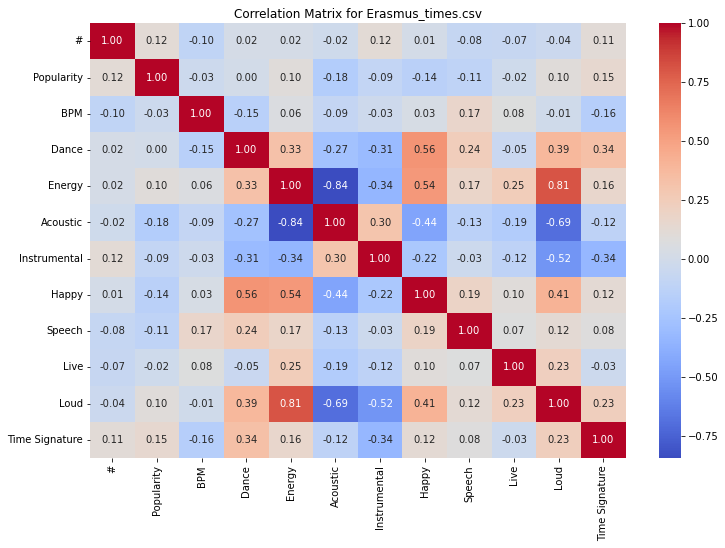

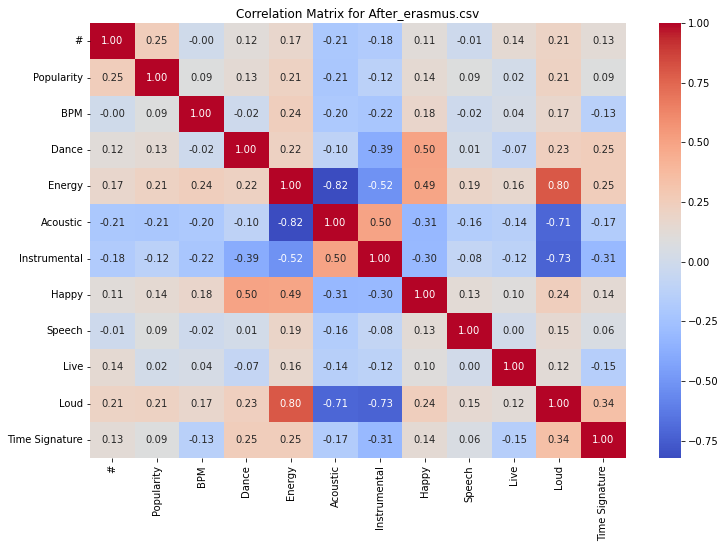

In [3]:
# Correlation heatmap 1
correlation_matrix1 = df1.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Erasmus_times.csv')
plt.show()

# Correlation heatmap 2
correlation_matrix2 = df2.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for After_erasmus.csv')
plt.show()

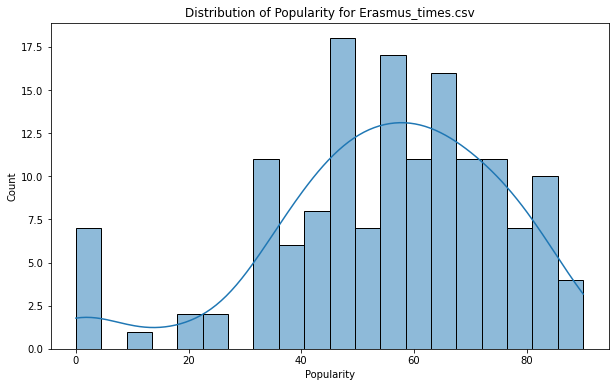

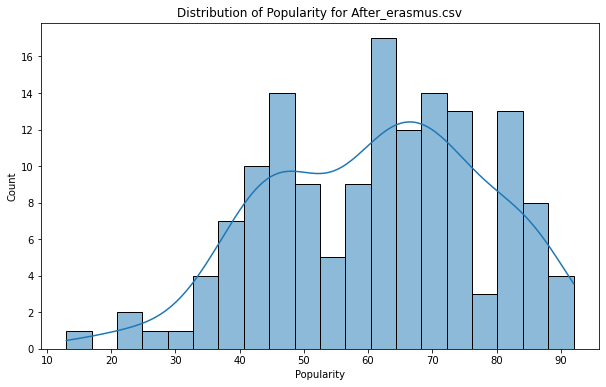

In [4]:
# Distribution of Popularity 1
plt.figure(figsize=(10, 6))
sns.histplot(df1['Popularity'], bins=20, kde=True)
plt.title('Distribution of Popularity for Erasmus_times.csv')
plt.show()

# Distribution of Popularity 2
plt.figure(figsize=(10, 6))
sns.histplot(df2['Popularity'], bins=20, kde=True)
plt.title('Distribution of Popularity for After_erasmus.csv')
plt.show()

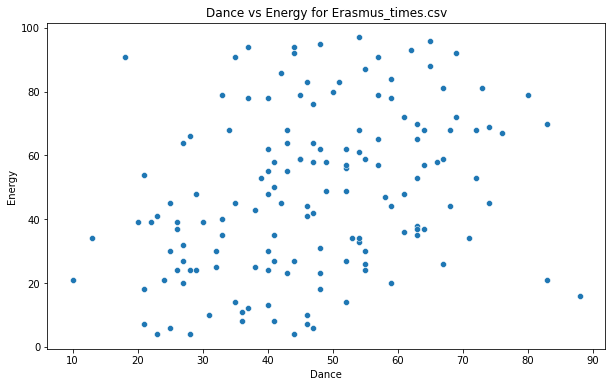

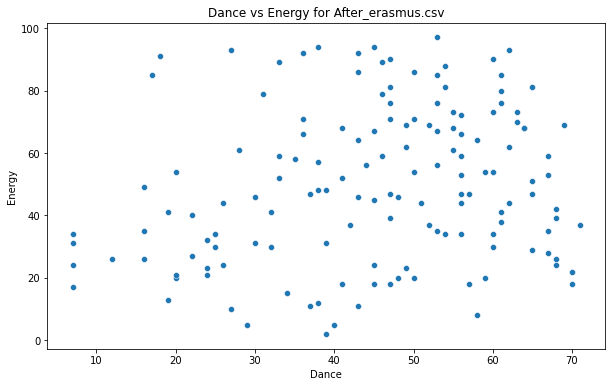

In [5]:
# Scatter plot - Dance vs Energy 1
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Dance', y='Energy', data=df1)
plt.title('Dance vs Energy for Erasmus_times.csv')
plt.show()

# Scatter plot - Dance vs Energy 2
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Dance', y='Energy', data=df2)
plt.title('Dance vs Energy for After_erasmus.csv')
plt.show()

Mean Squared Error for Erasmus_times.csv: 437.11224000000004
Feature Importance for Erasmus_times.csv: [0.2855165  0.43955259 0.2749309 ]


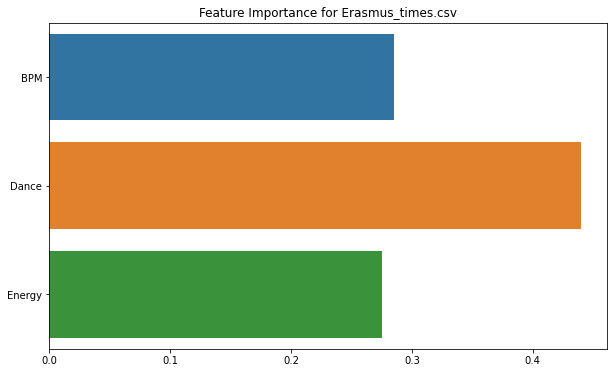


Mean Squared Error for After_erasmus.csv: 318.0633866666667
Feature Importance for After_erasmus.csv: [0.33591025 0.33722604 0.32686371]


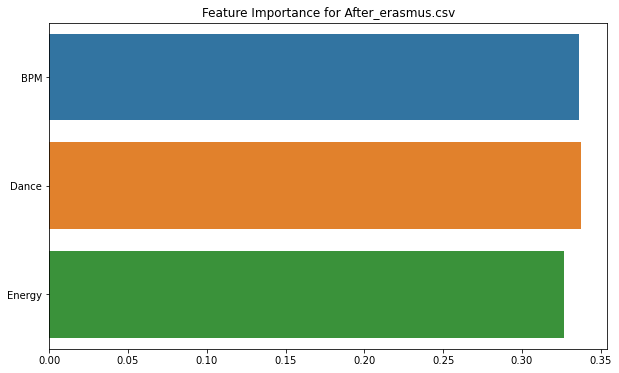

In [6]:
# Machine Learning for the first dataset
# Select features and target variable
features1 = df1[['BPM', 'Dance', 'Energy']]
target1 = df1['Popularity']

# Train-test split
X_train1, X_test1, y_train1, y_test1 = train_test_split(features1, target1, test_size=0.2, random_state=42)

# Model training
model1 = RandomForestRegressor(n_estimators=100, random_state=42)
model1.fit(X_train1, y_train1)

# Model prediction
y_pred1 = model1.predict(X_test1)

# Model evaluation
mse1 = mean_squared_error(y_test1, y_pred1)
print(f'Mean Squared Error for Erasmus_times.csv: {mse1}')

# Feature importance
feature_importance1 = model1.feature_importances_
print('Feature Importance for Erasmus_times.csv:', feature_importance1)

# Visualization of feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance1, y=features1.columns)
plt.title('Feature Importance for Erasmus_times.csv')
plt.show()


# Machine Learning for the second dataset
# Select features and target variable
features2 = df2[['BPM', 'Dance', 'Energy']]
target2 = df2['Popularity']

# Train-test split
X_train2, X_test2, y_train2, y_test2 = train_test_split(features2, target2, test_size=0.2, random_state=42)

# Model training
model2 = RandomForestRegressor(n_estimators=100, random_state=42)
model2.fit(X_train2, y_train2)

# Model prediction
y_pred2 = model2.predict(X_test2)

# Model evaluation
mse2 = mean_squared_error(y_test2, y_pred2)
print(f'\nMean Squared Error for After_erasmus.csv: {mse2}')

# Feature importance
feature_importance2 = model2.feature_importances_
print('Feature Importance for After_erasmus.csv:', feature_importance2)

# Visualization of feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance2, y=features2.columns)
plt.title('Feature Importance for After_erasmus.csv')
plt.show()

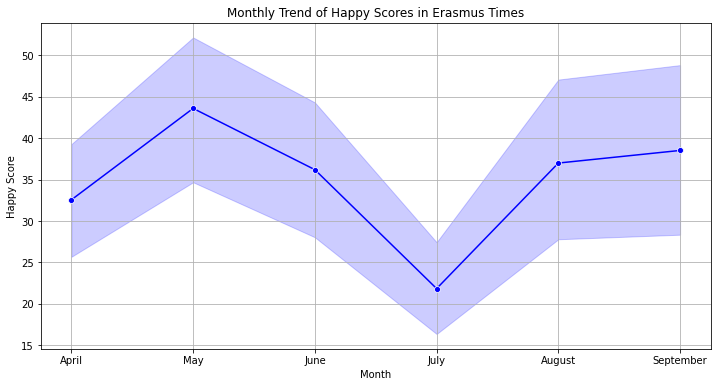

Overall mood of the playlist 1 by month:
 Month
April        32.560000
May          43.600000
June         36.200000
July         21.840000
August       37.000000
September    38.521739
Name: Happy, dtype: float64


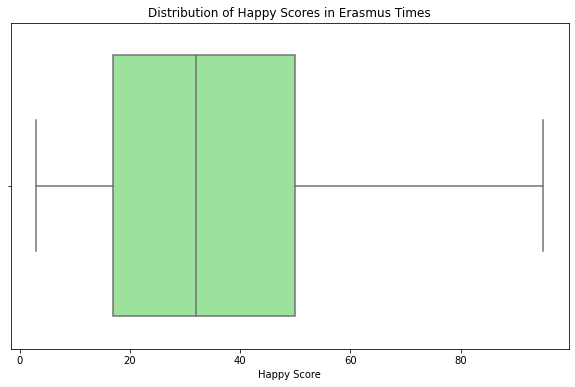

Overall mood of the playlist 1 is 34.81208053691275 .


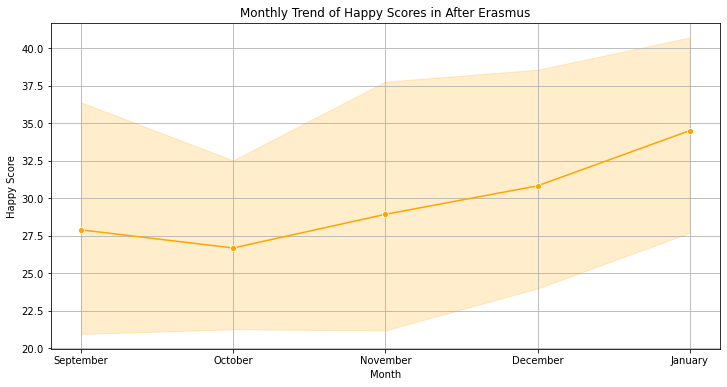

Overall mood of the playlist 2 by month:
 Month
September    27.896552
October      26.689655
November     28.931034
December     30.827586
January      34.500000
Name: Happy, dtype: float64


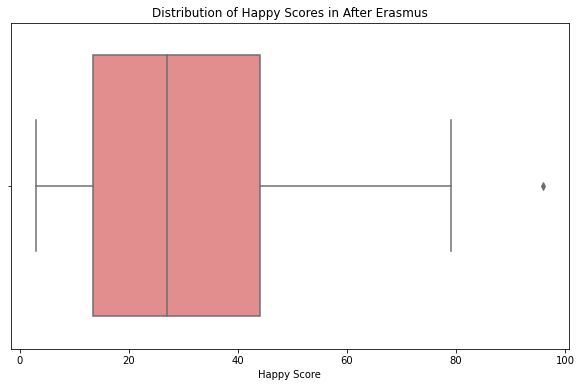

Overall mood of the playlist 2 is 30.020408163265305 .


In [7]:
#MOOD COMPARISON (MONTHLY & OVERALL)
# Add a new column indicating the month for each song in the first playlist
df1['Month'] = pd.cut(
    df1.index,
    bins=[0, 25, 50, 75, 100, 125, 149],  # Adjust the bins based on the total number of songs
    labels=['April', 'May', 'June', 'July', 'August', 'September']
)

# Line chart for the first playlist
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Happy', data=df1, marker='o', color='blue')
plt.title('Monthly Trend of Happy Scores in Erasmus Times')
plt.xlabel('Month')
plt.ylabel('Happy Score')
plt.grid(True)
plt.show()

# Overall mood of the playlist 1 by month
overall_mood1 = df1.groupby('Month')['Happy'].mean()
print("Overall mood of the playlist 1 by month:\n", overall_mood1)

# Box plot for the first playlist
plt.figure(figsize=(10, 6))
sns.boxplot(x=df1['Happy'], color='lightgreen')
plt.title('Distribution of Happy Scores in Erasmus Times')
plt.xlabel('Happy Score')
plt.show()

# Calculate the overall mood of the playlist 1
overall_mood1 = df1['Happy'].mean()
print("Overall mood of the playlist 1 is", overall_mood1, ".")


# Add a new column indicating the month for each song in the second playlist
df2['Month'] = pd.cut(
    df2.index,
    bins=[0, 29, 58, 87, 116, 147],  # Adjust the bins based on the total number of songs
    labels=['September', 'October', 'November', 'December', 'January']
)

# Line chart for the second playlist
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Happy', data=df2, marker='o', color='orange')
plt.title('Monthly Trend of Happy Scores in After Erasmus')
plt.xlabel('Month')
plt.ylabel('Happy Score')
plt.grid(True)
plt.show()

# Overall mood of the playlist 2 by month
overall_mood2 = df2.groupby('Month')['Happy'].mean()
print("Overall mood of the playlist 2 by month:\n", overall_mood2)

# Box plot for the second playlist
plt.figure(figsize=(10, 6))
sns.boxplot(x=df2['Happy'], color='lightcoral')
plt.title('Distribution of Happy Scores in After Erasmus')
plt.xlabel('Happy Score')
plt.show()

overall_mood2 = df2['Happy'].mean()
print("Overall mood of the playlist 2 is", overall_mood2, ".")


In [8]:
pip install matplotlib_venn

Note: you may need to restart the kernel to use updated packages.


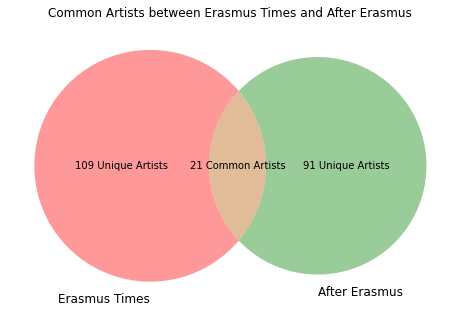

Common Artists:
{'Sons Of The East', 'Tom Odell', 'Bob Dylan', 'BØRNS', 'Michael Schulte', 'Young the Giant', 'Sleeping At Last', 'Cage The Elephant', 'The Lumineers', 'Kodaline', 'Woodkid', 'M83', 'Nick Mulvey', 'Hozier', 'Layup', 'mor ve ötesi', 'Sum 41', 'Coldplay', 'Thirty Seconds To Mars', 'Linkin Park', 'Tamino'}


In [9]:
#COMMON ARTISTS
# Extract unique artists from each playlist
artists_playlist1 = set(df1['Artist'].unique())
artists_playlist2 = set(df2['Artist'].unique())

# Find common artists
common_artists = artists_playlist1.intersection(artists_playlist2)

# Visualize common artists using a Venn diagram
venn_labels = {'100': len(artists_playlist1 - common_artists),
               '010': len(artists_playlist2 - common_artists),
               '110': len(common_artists)}

plt.figure(figsize=(8, 8))
venn_diagram = venn2(subsets=(len(artists_playlist1), len(artists_playlist2), len(common_artists)),
                     set_labels=('Erasmus Times', 'After Erasmus'))
venn_diagram.get_label_by_id('100').set_text(f'{venn_labels["100"]} Unique Artists')
venn_diagram.get_label_by_id('010').set_text(f'{venn_labels["010"]} Unique Artists')
venn_diagram.get_label_by_id('110').set_text(f'{venn_labels["110"]} Common Artists')

plt.title('Common Artists between Erasmus Times and After Erasmus')
plt.show()

# Find common artists
common_artists = artists_playlist1.intersection(artists_playlist2)

# Display the common artists
print("Common Artists:")
print(common_artists)

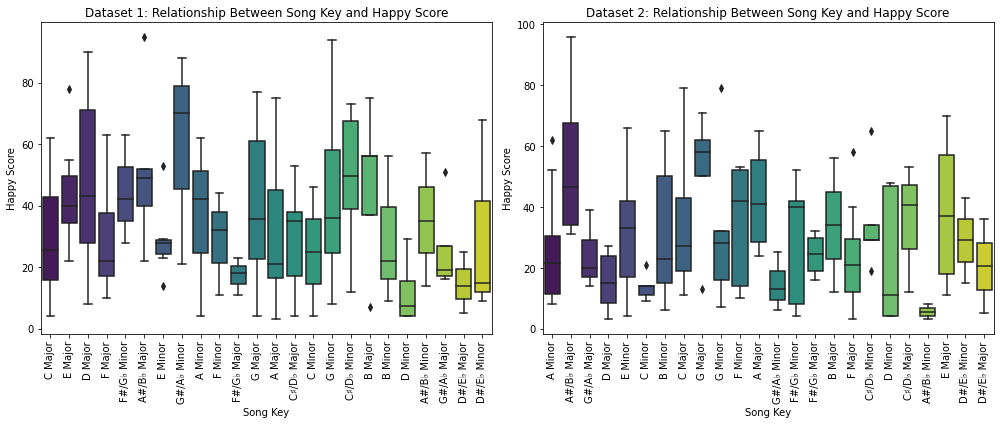

In [10]:
#RELATION BETWEEN SONG KEY AND HAPPY SCORE
# Set the font for Matplotlib
plt.rcParams['font.family'] = 'DejaVu Sans'

# Explore the relationship between Key and Happy for the first dataset
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Key', y='Happy', data=df1, palette='viridis')
plt.title('Dataset 1: Relationship Between Song Key and Happy Score')
plt.xlabel('Song Key')
plt.ylabel('Happy Score')
plt.xticks(rotation=90)

# Explore the relationship between Key and Happy for the second dataset
plt.subplot(1, 2, 2)
sns.boxplot(x='Key', y='Happy', data=df2, palette='viridis')
plt.title('Dataset 2: Relationship Between Song Key and Happy Score')
plt.xlabel('Song Key')
plt.ylabel('Happy Score')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

# Weather Analysis (Karlsruhe & Istanbul)

               time  temperature_2m_C  relative_humidity_2m_percentage  \
0  2023-04-08T00:00               6.2                               95   
1  2023-04-08T01:00               6.0                               96   
2  2023-04-08T02:00               6.0                               95   
3  2023-04-08T03:00               5.3                               97   
4  2023-04-08T04:00               5.3                               97   

   rain_mm  cloud_cover_percentage  sunshine_duration_s  
0      0.0                      45                  0.0  
1      0.0                      70                  0.0  
2      0.0                      98                  0.0  
3      0.0                      78                  0.0  
4      0.0                      37                  0.0  
       temperature_2m_C  relative_humidity_2m_percentage      rain_mm  \
count       4152.000000                      4152.000000  4152.000000   
mean          18.543955                        66.660886     

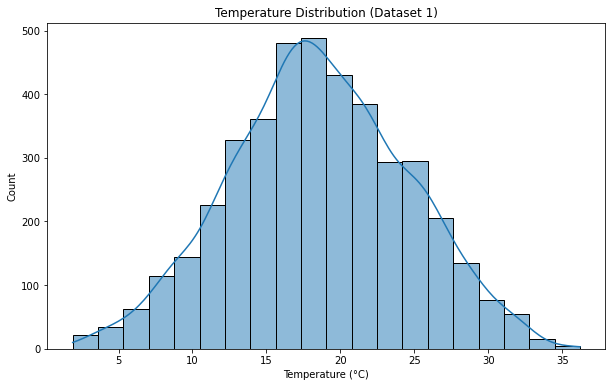

               time  temperature_2m_C  relative_humidity_2m_percentage  \
0  2023-09-28T00:00              21.0                               85   
1  2023-09-28T01:00              20.7                               86   
2  2023-09-28T02:00              20.5                               87   
3  2023-09-28T03:00              20.3                               92   
4  2023-09-28T04:00              20.6                               91   

   rain_mm  cloud_cover_percentage  sunshine_duration_s  
0      0.0                      38                  0.0  
1      0.0                      32                  0.0  
2      0.0                      34                  0.0  
3      0.0                      69                  0.0  
4      2.7                      40                  0.0  
       temperature_2m_C  relative_humidity_2m_percentage      rain_mm  \
count       2568.000000                      2568.000000  2568.000000   
mean          14.246417                        78.814252     

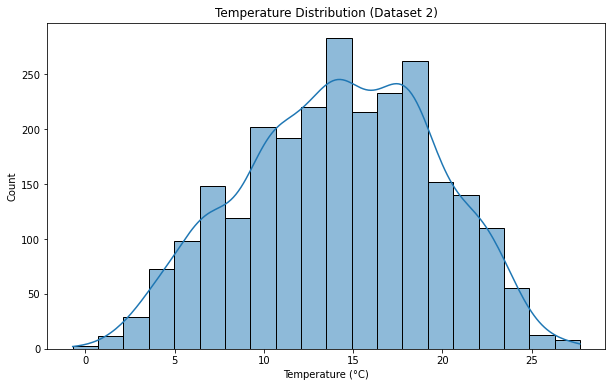

In [11]:
# Load the first weather dataset
file_path_weather1 = '/Users/ilkeoncu/Desktop/JUNIOR/CS210/CS210Project/karlsruhe_weather.csv'
df_weather1 = pd.read_csv(file_path_weather1, sep=';')

# Clean up column names by removing non-alphanumeric characters
df_weather1.columns = df_weather1.columns.str.replace('[^a-zA-Z0-9_]', '', regex=True)

# Explore the first weather dataset
print(df_weather1.head())
print(df_weather1.describe())

# Visualize temperature distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_weather1['temperature_2m_C'], bins=20, kde=True)
plt.title('Temperature Distribution (Dataset 1)')
plt.xlabel('Temperature (°C)')
plt.show()


# Load the second weather dataset
file_path_weather2 = '/Users/ilkeoncu/Desktop/JUNIOR/CS210/CS210Project/istanbul_weather.csv'
df_weather2 = pd.read_csv(file_path_weather2, sep=';')

# Clean up column names by removing non-alphanumeric characters
df_weather2.columns = df_weather2.columns.str.replace('[^a-zA-Z0-9_]', '', regex=True)

# Explore the second weather dataset
print(df_weather2.head())
print(df_weather2.describe())

# Visualize temperature distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_weather2['temperature_2m_C'], bins=20, kde=True)
plt.title('Temperature Distribution (Dataset 2)')
plt.xlabel('Temperature (°C)')
plt.show()


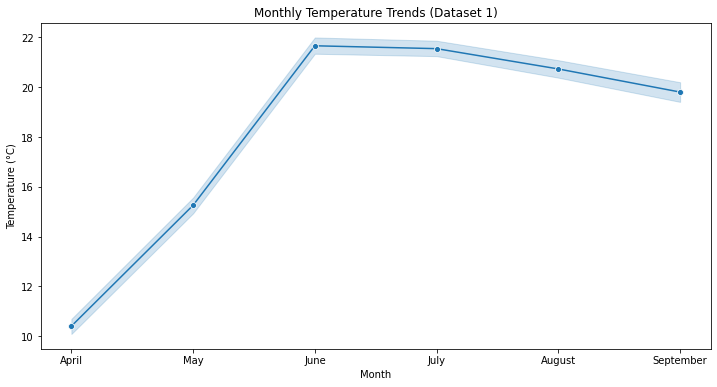

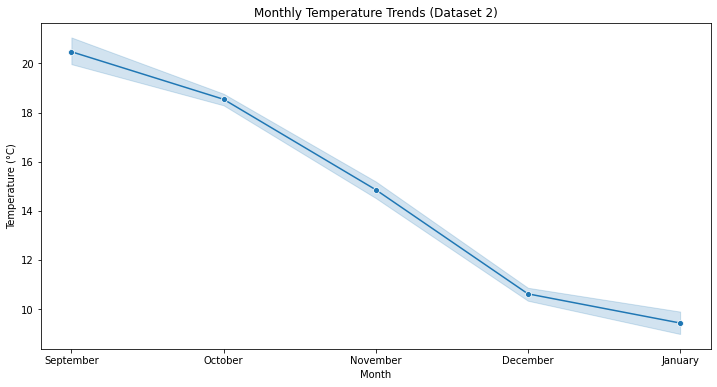

In [12]:
# Load the first weather dataset
file_path_weather1 = '/Users/ilkeoncu/Desktop/JUNIOR/CS210/CS210Project/karlsruhe_weather.csv'
df_weather1 = pd.read_csv(file_path_weather1, sep=';')

# Clean up column names by removing non-alphanumeric characters
df_weather1.columns = df_weather1.columns.str.replace('[^a-zA-Z0-9_]', '', regex=True)

# Convert 'time' column to datetime
df_weather1['time'] = pd.to_datetime(df_weather1['time'])

# Extract month and month names from 'time' column
df_weather1['month'] = df_weather1['time'].dt.month
df_weather1['month_name'] = df_weather1['time'].dt.strftime('%B')

# Visualize monthly temperature data using a line plot with month names
plt.figure(figsize=(12, 6))
sns.lineplot(x='month_name', y='temperature_2m_C', data=df_weather1, marker='o', sort=False)
plt.title('Monthly Temperature Trends (Dataset 1)')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.show()


# Load the first weather dataset
file_path_weather2 = '/Users/ilkeoncu/Desktop/JUNIOR/CS210/CS210Project/istanbul_weather.csv'
df_weather2 = pd.read_csv(file_path_weather2, sep=';')

# Clean up column names by removing non-alphanumeric characters
df_weather2.columns = df_weather2.columns.str.replace('[^a-zA-Z0-9_]', '', regex=True)

# Convert 'time' column to datetime
df_weather2['time'] = pd.to_datetime(df_weather2['time'])

# Extract month and month names from 'time' column
df_weather2['month'] = df_weather2['time'].dt.month
df_weather2['month_name'] = df_weather2['time'].dt.strftime('%B')

# Visualize monthly temperature data using a line plot with month names
plt.figure(figsize=(12, 6))
sns.lineplot(x='month_name', y='temperature_2m_C', data=df_weather2, marker='o', sort=False)
plt.title('Monthly Temperature Trends (Dataset 2)')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.show()

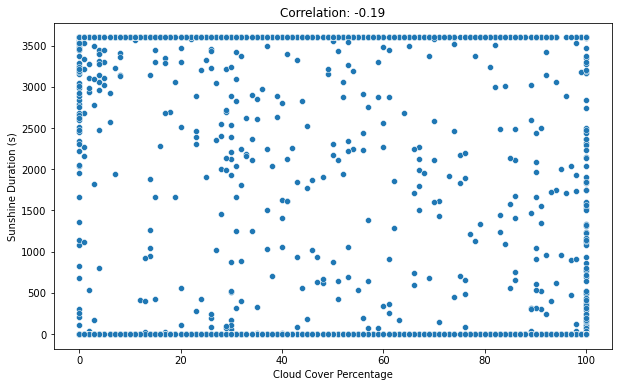

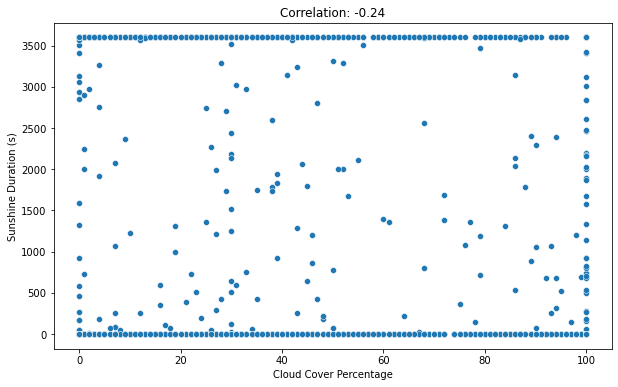

In [13]:
#CORRELATION BETWEEN CLOUD COVER AND SUNSHINE DURATION
# Calculate correlation between cloud cover and sunshine duration
correlation = df_weather1['cloud_cover_percentage'].corr(df_weather1['sunshine_duration_s'])

# Visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='cloud_cover_percentage', y='sunshine_duration_s', data=df_weather1)
plt.title(f'Correlation: {correlation:.2f}')
plt.xlabel('Cloud Cover Percentage')
plt.ylabel('Sunshine Duration (s)')
plt.show()

# Calculate correlation between cloud cover and sunshine duration
correlation = df_weather2['cloud_cover_percentage'].corr(df_weather2['sunshine_duration_s'])

# Visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='cloud_cover_percentage', y='sunshine_duration_s', data=df_weather2)
plt.title(f'Correlation: {correlation:.2f}')
plt.xlabel('Cloud Cover Percentage')
plt.ylabel('Sunshine Duration (s)')
plt.show()

It seems that there is a negative correlation between cloud cover percentage and sunshine duration in both of the datasets.

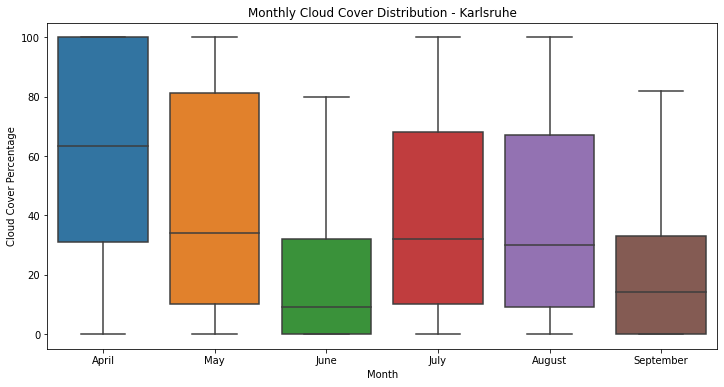

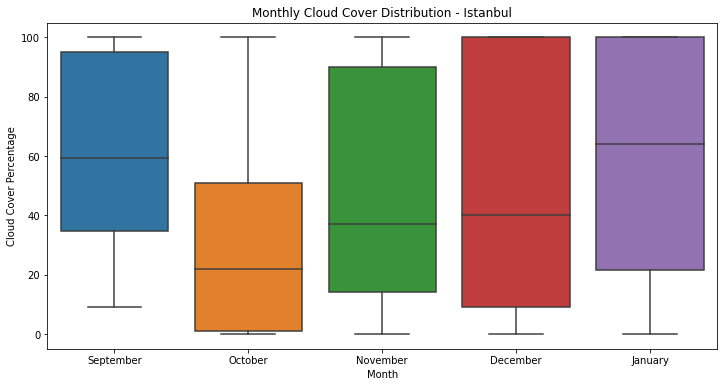

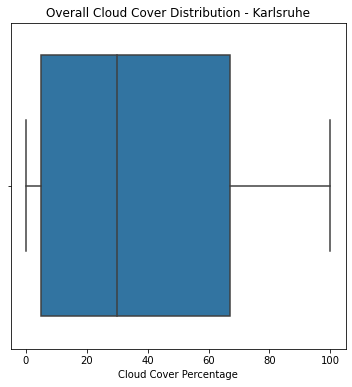

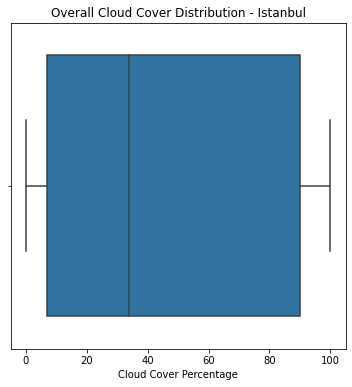

Overall Average Cloud Cover - Karlsruhe: 38.25%
Overall Average Cloud Cover - Istanbul: 45.21%


In [16]:
#MONTHLY CLOUD COVER DISTRIBUTION
# Convert 'time' column to datetime
df_weather1['time'] = pd.to_datetime(df_weather1['time'])
df_weather2['time'] = pd.to_datetime(df_weather2['time'])

# Extract month and month names
df_weather1['month'] = df_weather1['time'].dt.month
df_weather1['month_name'] = df_weather1['time'].dt.strftime('%B')

df_weather2['month'] = df_weather2['time'].dt.month
df_weather2['month_name'] = df_weather2['time'].dt.strftime('%B')

# Visualize monthly cloud cover distribution for the first weather dataset
plt.figure(figsize=(12, 6))
sns.boxplot(x='month_name', y='cloud_cover_percentage', data=df_weather1, showfliers=False)
plt.title('Monthly Cloud Cover Distribution - Karlsruhe')
plt.xlabel('Month')
plt.ylabel('Cloud Cover Percentage')
plt.show()

# Visualize monthly cloud cover distribution for the second weather dataset
plt.figure(figsize=(12, 6))
sns.boxplot(x='month_name', y='cloud_cover_percentage', data=df_weather2, showfliers=False)
plt.title('Monthly Cloud Cover Distribution - Istanbul')
plt.xlabel('Month')
plt.ylabel('Cloud Cover Percentage')
plt.show()


# Convert 'time' column to datetime
df_weather1['time'] = pd.to_datetime(df_weather1['time'])
df_weather2['time'] = pd.to_datetime(df_weather2['time'])

# Extract month and month names
df_weather1['month'] = df_weather1['time'].dt.month
df_weather1['month_name'] = df_weather1['time'].dt.strftime('%B')

df_weather2['month'] = df_weather2['time'].dt.month
df_weather2['month_name'] = df_weather2['time'].dt.strftime('%B')

# Calculate overall average cloud cover percentage
avg_cloud1 = df_weather1['cloud_cover_percentage'].mean()
avg_cloud2 = df_weather2['cloud_cover_percentage'].mean()

# Visualize overall cloud cover distribution for the first weather dataset
plt.figure(figsize=(6, 6))
sns.boxplot(x='cloud_cover_percentage', data=df_weather1, showfliers=False)
plt.title('Overall Cloud Cover Distribution - Karlsruhe')
plt.xlabel('Cloud Cover Percentage')
plt.show()

# Visualize overall cloud cover distribution for the second weather dataset
plt.figure(figsize=(6, 6))
sns.boxplot(x='cloud_cover_percentage', data=df_weather2, showfliers=False)
plt.title('Overall Cloud Cover Distribution - Istanbul')
plt.xlabel('Cloud Cover Percentage')
plt.show()

# Display the average values
print(f'Overall Average Cloud Cover - Karlsruhe: {avg_cloud1:.2f}%')
print(f'Overall Average Cloud Cover - Istanbul: {avg_cloud2:.2f}%')

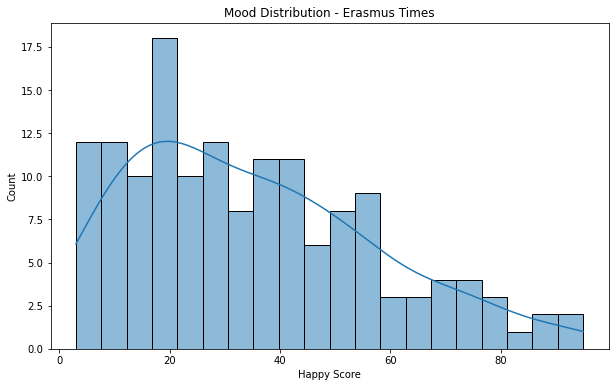

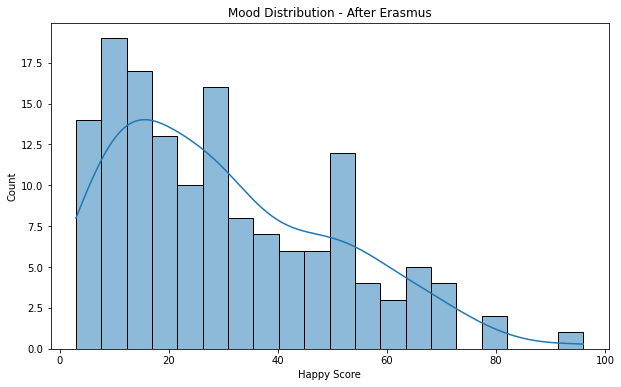

In [17]:
#MOOD DISTRIBUTION
# Visualize mood distribution for the first playlist
plt.figure(figsize=(10, 6))
sns.histplot(df1['Happy'], bins=20, kde=True)
plt.title('Mood Distribution - Erasmus Times')
plt.xlabel('Happy Score')
plt.show()

# Visualize mood distribution for the second playlist
plt.figure(figsize=(10, 6))
sns.histplot(df2['Happy'], bins=20, kde=True)
plt.title('Mood Distribution - After Erasmus')
plt.xlabel('Happy Score')
plt.show()

Overall mood of the playlist 1 (Erasmus Times) by month:
 Month
April        32.560000
May          43.600000
June         36.200000
July         21.840000
August       37.000000
September    38.521739
Name: Happy, dtype: float64


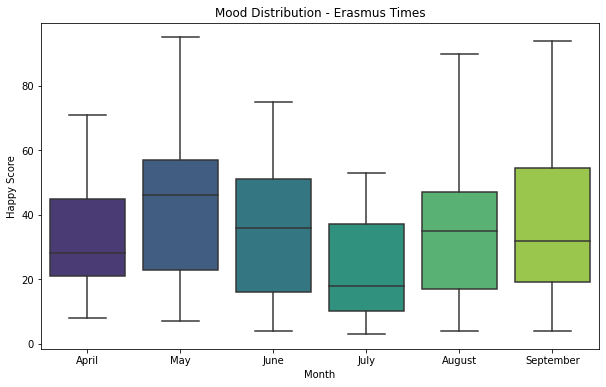

Overall mood of the playlist 2 (After Erasmus) by month:
 Month
September    27.896552
October      26.689655
November     28.931034
December     30.827586
January      34.500000
Name: Happy, dtype: float64


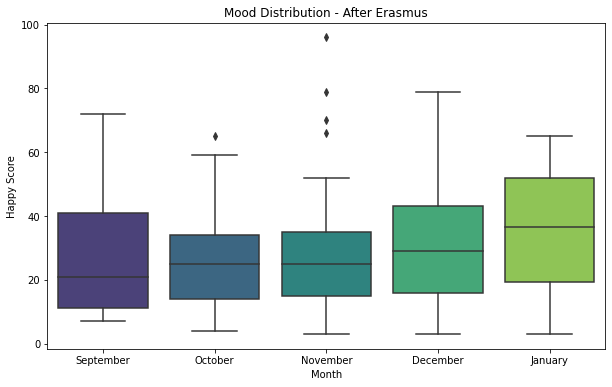

In [18]:
#MOOD DISTRIBUTION MONTHLY
# Add a new column indicating the month for each song in the first playlist
df1['Month'] = pd.cut(
    df1.index,
    bins=[0, 25, 50, 75, 100, 125, 149],  # Adjust the bins based on the total number of songs
    labels=['April', 'May', 'June', 'July', 'August', 'September']
)

# Overall mood of the playlist 1 by month
overall_mood1 = df1.groupby('Month')['Happy'].mean()
print("Overall mood of the playlist 1 (Erasmus Times) by month:\n", overall_mood1)

# Box plot for the first playlist
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='Happy', data=df1, palette='viridis')
plt.title('Mood Distribution - Erasmus Times')
plt.xlabel('Month')
plt.ylabel('Happy Score')
plt.show()



# Add a new column indicating the month for each song in the second playlist
df2['Month'] = pd.cut(
    df2.index,
    bins=[0, 29, 58, 87, 116, 147],  # Adjust the bins based on the total number of songs
    labels=['September', 'October', 'November', 'December', 'January']
)


# Overall mood of the playlist 2 by month
overall_mood2 = df2.groupby('Month')['Happy'].mean()
print("Overall mood of the playlist 2 (After Erasmus) by month:\n", overall_mood2)

# Box plot for the second playlist
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='Happy', data=df2, palette='viridis')
plt.title('Mood Distribution - After Erasmus')
plt.xlabel('Month')
plt.ylabel('Happy Score')
plt.show()

# Hypothesis Testing

HYPOTHESIS TESTING#1

The code below is for testing the hypotheses which are based on the assumption that changes in weather conditions, specifically the duration of sunshine, may have an impact on the mood scores in each playlist. The code uses Pearson correlation to test these hypotheses, and the interpretation involves assessing whether the p-values are below a significance level (commonly set at 0.05) to determine the presence of a significant relationship.

For Playlist 1 (Erasmus Times):
Null Hypothesis (H0): There is no significant relationship between sunshine duration and mood scores in Playlist 1.
Alternative Hypothesis (H1): There is a significant relationship between sunshine duration and mood scores in Playlist 1.

For Playlist 2 (After Erasmus):
Null Hypothesis (H0): There is no significant relationship between sunshine duration and mood scores in Playlist 2.
Alternative Hypothesis (H1): There is a significant relationship between sunshine duration and mood scores in Playlist 2.

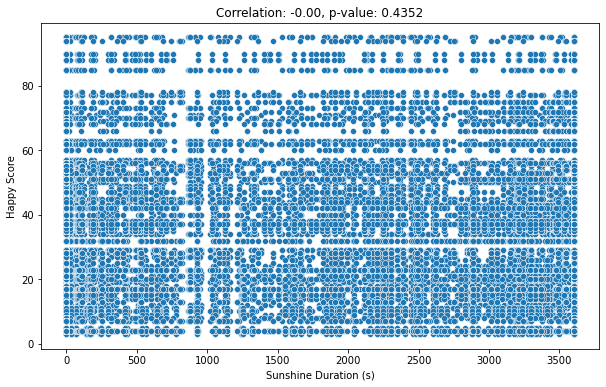

Fail to reject the null hypothesis. There is no significant relationship.


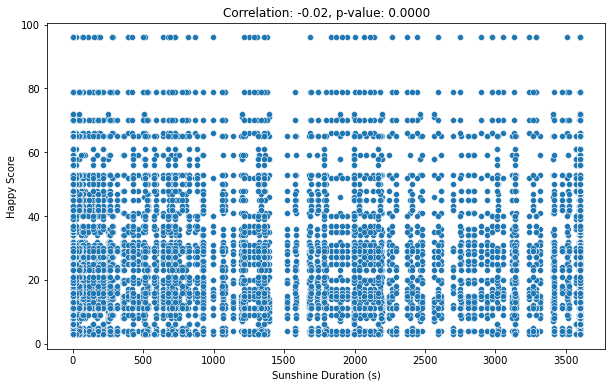

Reject the null hypothesis. There is a significant relationship between Weather 2 and Playlist 2.


In [19]:
# Assume df_weather1 and df1 are your weather and mood DataFrames for playlist 1
# Assume df_weather2 and df2 are your weather and mood DataFrames for playlist 2

# Merge the two DataFrames on a common column, e.g., 'month_name' and 'Month' for playlist 1
df_combined1 = pd.merge(df_weather1, df1, left_on='month_name', right_on='Month')

# Calculate Pearson correlation and p-value for playlist 1
correlation1, p_value1 = pearsonr(df_combined1['Happy'], df_combined1['sunshine_duration_s'])

# Visualize the relationship for playlist 1
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sunshine_duration_s', y='Happy', data=df_combined1)
plt.title(f'Correlation: {correlation1:.2f}, p-value: {p_value1:.4f}')
plt.xlabel('Sunshine Duration (s)')
plt.ylabel('Happy Score')
plt.show()

# Interpret the results for playlist 1
if p_value1 < 0.05:
    print("Reject the null hypothesis. There is a significant relationship between Weather 1 and Playlist 1.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship.")

# Merge the two DataFrames on a common column, e.g., 'month_name' and 'Month' for playlist 2
df_combined2 = pd.merge(df_weather2, df2, left_on='month_name', right_on='Month')

# Calculate Pearson correlation and p-value for playlist 2
correlation2, p_value2 = pearsonr(df_combined2['Happy'], df_combined2['sunshine_duration_s'])

# Visualize the relationship for playlist 2
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sunshine_duration_s', y='Happy', data=df_combined2)
plt.title(f'Correlation: {correlation2:.2f}, p-value: {p_value2:.4f}')
plt.xlabel('Sunshine Duration (s)')
plt.ylabel('Happy Score')
plt.show()

# Interpret the results for playlist 2
if p_value2 < 0.05:
    print("Reject the null hypothesis. There is a significant relationship between Weather 2 and Playlist 2.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship.")

HYPOTHESIS TESTING #2

The code below is designed to test hypotheses regarding the potential impact of changes in cloud coverage, specifically exploring the correlation between cloud cover percentages and mood scores in two playlists. The analysis utilizes Pearson correlation and assesses the significance of the relationship by examining p-values, with a significance level set at 0.05.

Playlist 1 (Erasmus Times):
Null Hypothesis (H0): There is no significant relationship between cloud cover percentage (Weather 1) and mood scores in Playlist 1.
Alternative Hypothesis (H1): There is a significant relationship between cloud cover percentage (Weather 1) and mood scores in Playlist 1.

Playlist 2 (After Erasmus):
Null Hypothesis (H0): There is no significant relationship between cloud cover percentage (Weather 2) and mood scores in Playlist 2.
Alternative Hypothesis (H1): There is a significant relationship between cloud cover percentage (Weather 2) and mood scores in Playlist 2.

In summary, the analysis suggests that there is a significant relationship between cloud cover and mood scores in both playlists based on the provided p-values, leading to the rejection of the null hypotheses.

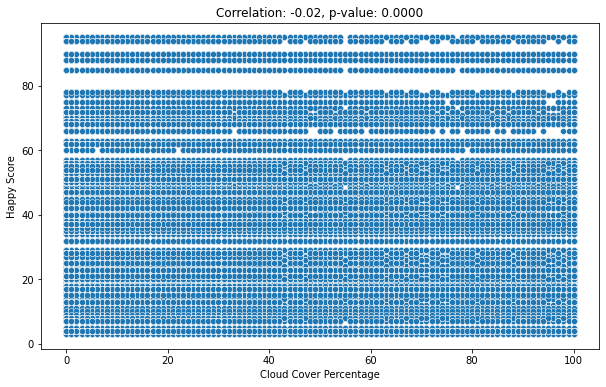

Reject the null hypothesis. There is a significant relationship between Cloud Cover (Weather 1) and Playlist 1.


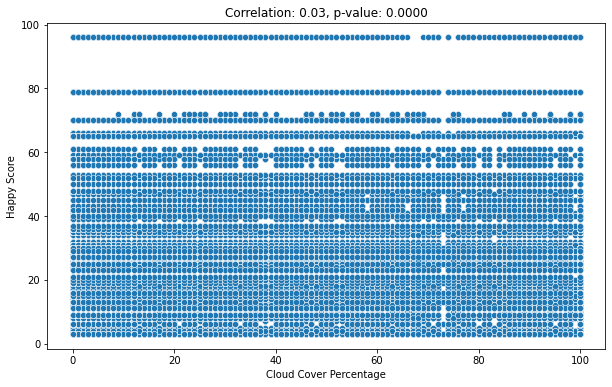

Reject the null hypothesis. There is a significant relationship between Cloud Cover (Weather 2) and Playlist 2.


In [20]:
# Merge the two DataFrames on a common column, e.g., 'month_name' and 'Month' for playlist 1
df_combined1 = pd.merge(df_weather1, df1, left_on='month_name', right_on='Month')

# Calculate Pearson correlation and p-value for playlist 1 - Cloud Cover
correlation1_cloud, p_value1_cloud = pearsonr(df_combined1['Happy'], df_combined1['cloud_cover_percentage'])

# Visualize the relationship for playlist 1 - Cloud Cover
plt.figure(figsize=(10, 6))
sns.scatterplot(x='cloud_cover_percentage', y='Happy', data=df_combined1)
plt.title(f'Correlation: {correlation1_cloud:.2f}, p-value: {p_value1_cloud:.4f}')
plt.xlabel('Cloud Cover Percentage')
plt.ylabel('Happy Score')
plt.show()

# Interpret the results for playlist 1 - Cloud Cover
if p_value1_cloud < 0.05:
    print("Reject the null hypothesis. There is a significant relationship between Cloud Cover (Weather 1) and Playlist 1.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship for Playlist 1.")

# Merge the two DataFrames on a common column, e.g., 'month_name' and 'Month' for playlist 2
df_combined2 = pd.merge(df_weather2, df2, left_on='month_name', right_on='Month')

# Calculate Pearson correlation and p-value for playlist 2 - Cloud Cover
correlation2_cloud, p_value2_cloud = pearsonr(df_combined2['Happy'], df_combined2['cloud_cover_percentage'])

# Visualize the relationship for playlist 2 - Cloud Cover
plt.figure(figsize=(10, 6))
sns.scatterplot(x='cloud_cover_percentage', y='Happy', data=df_combined2)
plt.title(f'Correlation: {correlation2_cloud:.2f}, p-value: {p_value2_cloud:.4f}')
plt.xlabel('Cloud Cover Percentage')
plt.ylabel('Happy Score')
plt.show()

# Interpret the results for playlist 2 - Cloud Cover
if p_value2_cloud < 0.05:
    print("Reject the null hypothesis. There is a significant relationship between Cloud Cover (Weather 2) and Playlist 2.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship for Playlist 2.")

HYPOTHESIS TESTING#3

The below code (second one) aims to investigate the potential correlation between rain levels and mood scores in two playlists, utilizing Pearson correlation and assessing the significance of the relationship through p-values with a significance level set at 0.05.

Playlist 1 (Erasmus Times):
Null Hypothesis (H0): There is no significant relationship between rain levels (Weather 1) and mood scores in Playlist 1.
Alternative Hypothesis (H1): There is a significant relationship between rain levels (Weather 1) and mood scores in Playlist 1.

Playlist 2 (After Erasmus):
Null Hypothesis (H0): There is no significant relationship between rain levels (Weather 2) and mood scores in Playlist 2.
Alternative Hypothesis (H1): There is a significant relationship between rain levels (Weather 2) and mood scores in Playlist 2.

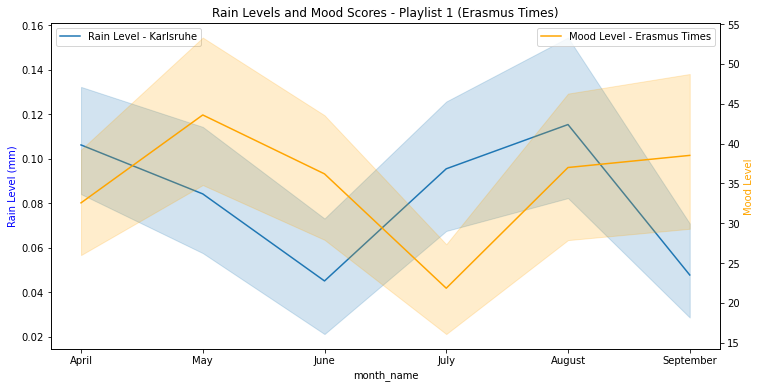

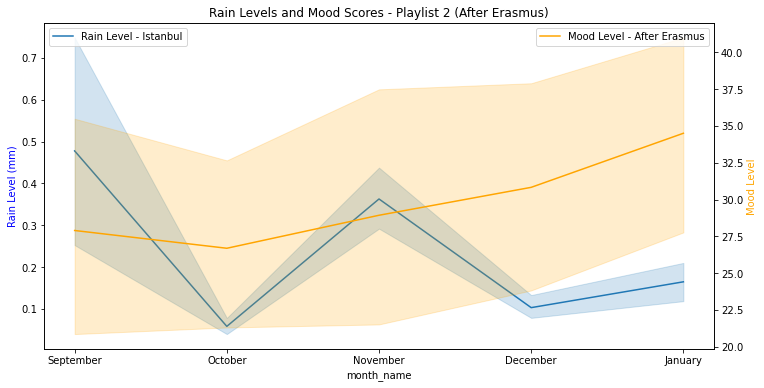

In [21]:
# Graph 1: Weather 1 and Playlist 1
plt.figure(figsize=(12, 6))
ax1 = sns.lineplot(x='month_name', y='rain_mm', data=df_weather1, label='Rain Level - Karlsruhe')
ax2 = plt.twinx()  # Create a secondary y-axis
sns.lineplot(x='Month', y='Happy', data=df1, ax=ax2, label='Mood Level - Erasmus Times', color='orange')

# Set labels and title
ax1.set_ylabel('Rain Level (mm)', color='blue')
ax2.set_ylabel('Mood Level', color='orange')
plt.title('Rain Levels and Mood Scores - Playlist 1 (Erasmus Times)')
plt.xlabel('Month')

# Show legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

# Graph 2: Weather 2 and Playlist 2
plt.figure(figsize=(12, 6))
ax1 = sns.lineplot(x='month_name', y='rain_mm', data=df_weather2, label='Rain Level - Istanbul')
ax2 = plt.twinx()  # Create a secondary y-axis
sns.lineplot(x='Month', y='Happy', data=df2, ax=ax2, label='Mood Level - After Erasmus', color='orange')

# Set labels and title
ax1.set_ylabel('Rain Level (mm)', color='blue')
ax2.set_ylabel('Mood Level', color='orange')
plt.title('Rain Levels and Mood Scores - Playlist 2 (After Erasmus)')
plt.xlabel('Month')

# Show legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


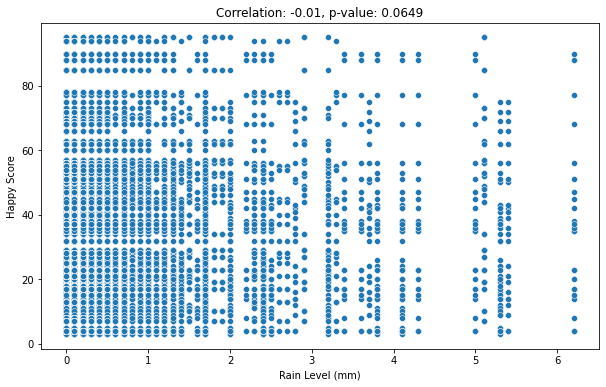

Fail to reject the null hypothesis. There is no significant relationship for Playlist 1.


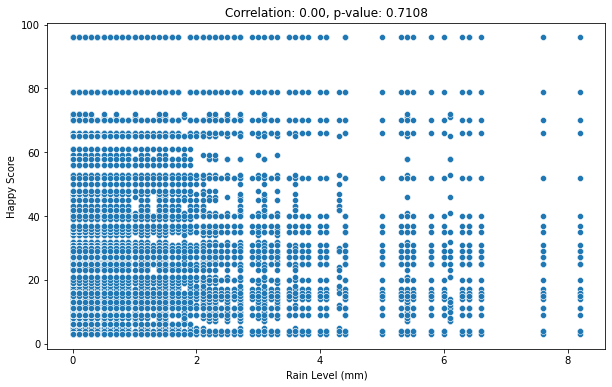

Fail to reject the null hypothesis. There is no significant relationship for Playlist 2.


In [22]:
# Merge the two DataFrames on a common column, e.g., 'month_name' and 'Month' for playlist 1
df_combined1_rain = pd.merge(df_weather1, df1, left_on='month_name', right_on='Month')

# Calculate Pearson correlation and p-value for rain and mood scores for playlist 1
correlation1_rain, p_value1_rain = pearsonr(df_combined1_rain['rain_mm'], df_combined1_rain['Happy'])

# Visualize the relationship for playlist 1 - Rain and Mood
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rain_mm', y='Happy', data=df_combined1_rain)
plt.title(f'Correlation: {correlation1_rain:.2f}, p-value: {p_value1_rain:.4f}')
plt.xlabel('Rain Level (mm)')
plt.ylabel('Happy Score')
plt.show()

# Interpret the results for playlist 1 - Rain and Mood
if p_value1_rain < 0.05:
    print("Reject the null hypothesis. There is a significant relationship between Rain Level (Weather 1) and Playlist 1.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship for Playlist 1.")
    

    # Merge the two DataFrames on a common column, e.g., 'month_name' and 'Month' for playlist 2
df_combined2_rain = pd.merge(df_weather2, df2, left_on='month_name', right_on='Month')

# Calculate Pearson correlation and p-value for rain and mood scores for playlist 2
correlation2_rain, p_value2_rain = pearsonr(df_combined2_rain['rain_mm'], df_combined2_rain['Happy'])

# Visualize the relationship for playlist 2 - Rain and Mood
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rain_mm', y='Happy', data=df_combined2_rain)
plt.title(f'Correlation: {correlation2_rain:.2f}, p-value: {p_value2_rain:.4f}')
plt.xlabel('Rain Level (mm)')
plt.ylabel('Happy Score')
plt.show()

# Interpret the results for playlist 2 - Rain and Mood
if p_value2_rain < 0.05:
    print("Reject the null hypothesis. There is a significant relationship between Rain Level (Weather 2) and Playlist 2.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship for Playlist 2.")

# SECOND PART: COLLECTIVE PLAYLIST

The aim of the second part of the project is to add sum spice to the analysis :) Since I listen the songs I like repeatedly, I wanted to see my music taste covering all the months in both of the playlists that are analyzed in the first part (April-January). As an extra, at the end, I use a recommendation system using Spotify API to recommend me songs from my favourite songs' tracks.

# Collecting Data & Data Cleaning

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bs4
import requests

from bs4 import BeautifulSoup
import csv

# Replace 'your_file_path.csv' with the actual path to your CSV file
file_path = '/Users/ilkeoncu/Desktop/JUNIOR/CS210/CS210Project/All_in_all.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to check if it loaded correctly
df.head()

#                             Song         Artist  Popularity  BPM  \
0  218  Bir Derdim Var - Canlı Senfonik   mor ve ötesi          41  121   
1  285                 Wherever You Are       Kodaline          57  126   
2   12                      Someone New         Hozier          74   92   
3   17                          My Type    Saint Motel          70  118   
4   52                           Lonely  Palaye Royale          69  148   

                                              Genres  \
0  turkish alternative, turkish alternative rock,...   
1                             irish pop, modern rock   
2   irish singer-songwriter, modern rock, pov: indie   
3  la indie, modern alternative rock, modern rock...   
4               modern alternative rock, vegas indie   

              Parent Genres                            Album  Album Date  \
0                 Pop, Rock  Bir Derdim Var (Canlı Senfonik)  2018-12-28   
1                 Pop, Rock                One Day At A Time  2020-06-12   
2  Folk/Acoustic, Rock, Pop                           Hozier  2014-07-20   
3                 Pop, Rock                          My Type  2014-06-17   
4                      Rock                     The Bastards  2020-05-29   

    Time  ...  Live  Loud          Key  Time Signature    Added At  \
0  04:16  ...    80    -7      B Minor               4  2024-01-17   
1  03:05  ...     0    -7      E Major               4  2024-01-17   
2  03:42  ...    20    -6      G Major               4  2024-01-17   
3  03:26  ...     0    -3  A#/B♭ Major               4  2024-01-17   
4  03:06  ...     0    -6      D Minor               4  2024-01-17   

         Spotify Track Id                    Album Label  Camelot  \
0  0IGAXCD6NlQlNSvuptbjxR               RAKUN MÜZİK FİLM      10A   
1  42fu5cmEhi5EWmoqaZUZuK                        Fantasy      12B   
2  22sS7JkzeVeq4vOPCB6Fbj  Universal-Island Records Ltd.       9B   
3  2DFi8rwHcVkTTgu7PULhtI                  Parlophone UK       6B   
4  4jXbcY2ulVT7MOPdN8nR50               Sumerian Records       7A   

                                   Spotify Track Img  \
0  https://p.scdn.co/mp3-preview/a3faef5c1496f57f...   
1                                                NaN   
2                                                NaN   
3  https://p.scdn.co/mp3-preview/c2a53d509f5073cc...   
4                                                NaN   

                                        Song Preview  
0  https://i.scdn.co/image/ab67616d000048513f4cd2...  
1  https://i.scdn.co/image/ab67616d0000485157ec56...  
2  https://i.scdn.co/image/ab67616d000048517a9bf5...  
3  https://i.scdn.co/image/ab67616d000048514c8d86...  
4  https://i.scdn.co/image/ab67616d0000485169ec58...  

[5 rows x 26 columns]

In [24]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print(missing_values)

#                     0
Song                  0
Artist                0
Popularity            0
BPM                   0
Genres                0
Parent Genres         0
Album                 0
Album Date            0
Time                  0
Dance                 0
Energy                0
Acoustic              0
Instrumental          0
Happy                 0
Speech                0
Live                  0
Loud                  0
Key                   0
Time Signature        0
Added At              0
Spotify Track Id      0
Album Label           0
Camelot               0
Spotify Track Img    15
Song Preview          0
dtype: int64


In [25]:
# Drop rows with missing values
df_cleaned = df.dropna()

In [26]:
# Check for duplicate rows
duplicate_rows = df.duplicated()
print("Number of duplicate rows:", duplicate_rows.sum())

Number of duplicate rows: 20


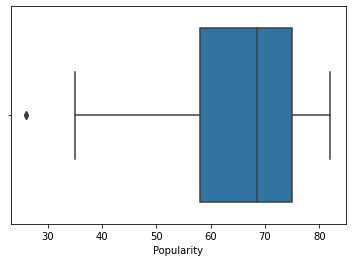

In [27]:
# Example for 'Popularity' column
sns.boxplot(x=df['Popularity'])
plt.show()

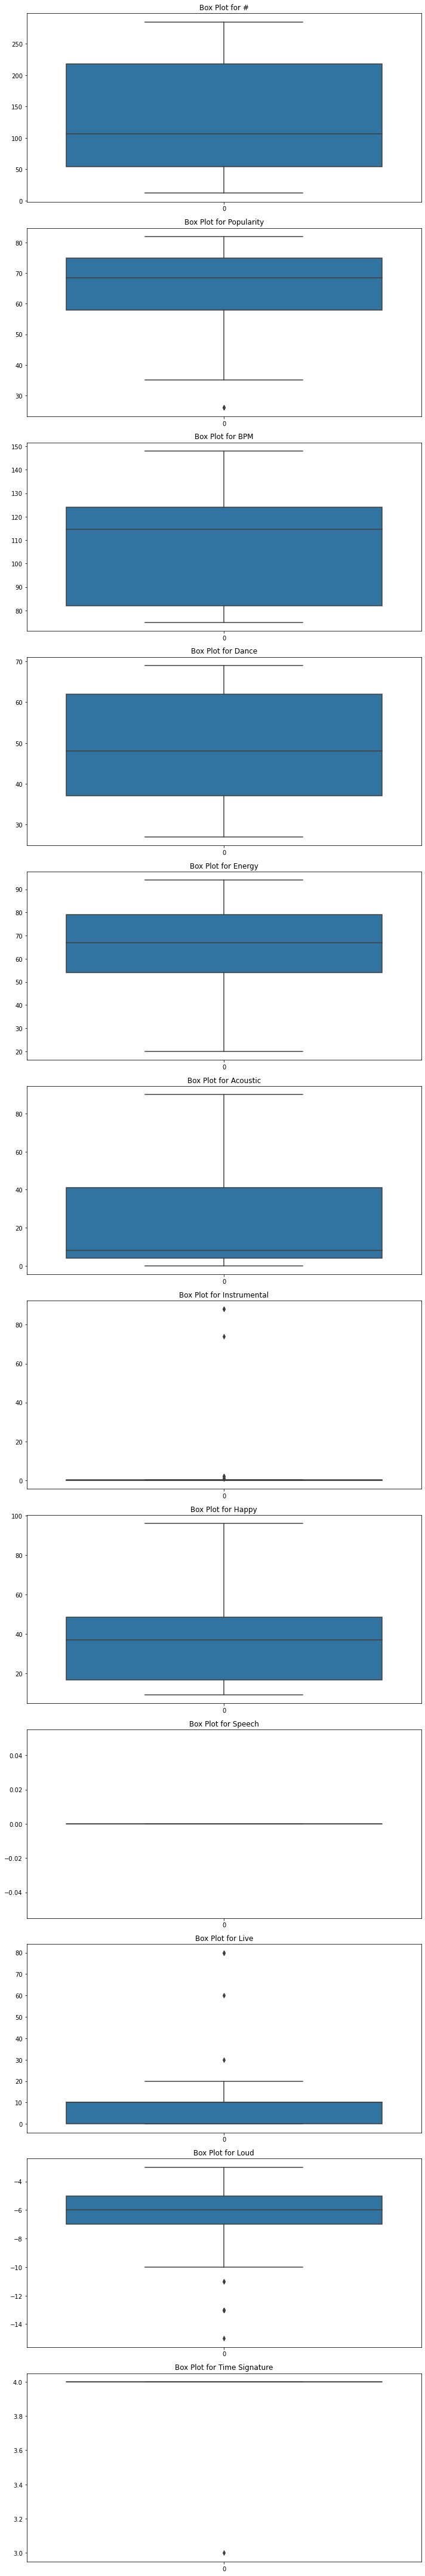

In [28]:
#IDENTIFYING OUTLIERS
#Depending on the columns, you might want to identify and visualize outliers.
#Box plots are useful for this purpose.

# Set the size of the figure based on the number of numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns
num_columns = len(numeric_columns)
fig, axes = plt.subplots(nrows=num_columns, ncols=1, figsize=(10, 5 * num_columns))

# Iterate through each numeric column and create a box plot
for i, column in enumerate(numeric_columns):
    sns.boxplot(data=df[column], ax=axes[i])
    axes[i].set_title(f'Box Plot for {column}')

plt.tight_layout()
plt.show()

# Exploratory Data Analysis (EDA)

In [29]:
#SUMMARY STATISTICS
df.describe()

#  Popularity         BPM      Dance     Energy   Acoustic  \
count   40.000000   40.000000   40.000000  40.000000  40.000000  40.000000   
mean   129.875000   63.075000  108.700000  49.475000  65.700000  24.700000   
std     89.792692   16.401044   22.294302  12.407581  19.546395  30.421989   
min     12.000000   26.000000   75.000000  27.000000  20.000000   0.000000   
25%     54.000000   58.000000   82.000000  37.000000  54.000000   4.000000   
50%    107.000000   68.500000  114.500000  48.000000  67.000000   8.000000   
75%    218.000000   75.000000  124.000000  62.000000  79.000000  41.000000   
max    285.000000   82.000000  148.000000  69.000000  94.000000  90.000000   

       Instrumental      Happy  Speech       Live       Loud  Time Signature  
count       40.0000  40.000000    40.0  40.000000  40.000000       40.000000  
mean         6.4750  34.775000     0.0  12.000000  -6.925000        3.975000  
std         22.2457  19.491599     0.0  19.242048   3.083351        0.158114  
min          0.0000   9.000000     0.0   0.000000 -15.000000        3.000000  
25%          0.0000  16.750000     0.0   0.000000  -7.000000        4.000000  
50%          0.0000  37.000000     0.0  10.000000  -6.000000        4.000000  
75%          0.2500  48.500000     0.0  10.000000  -5.000000        4.000000  
max         88.0000  96.000000     0.0  80.000000  -3.000000        4.000000

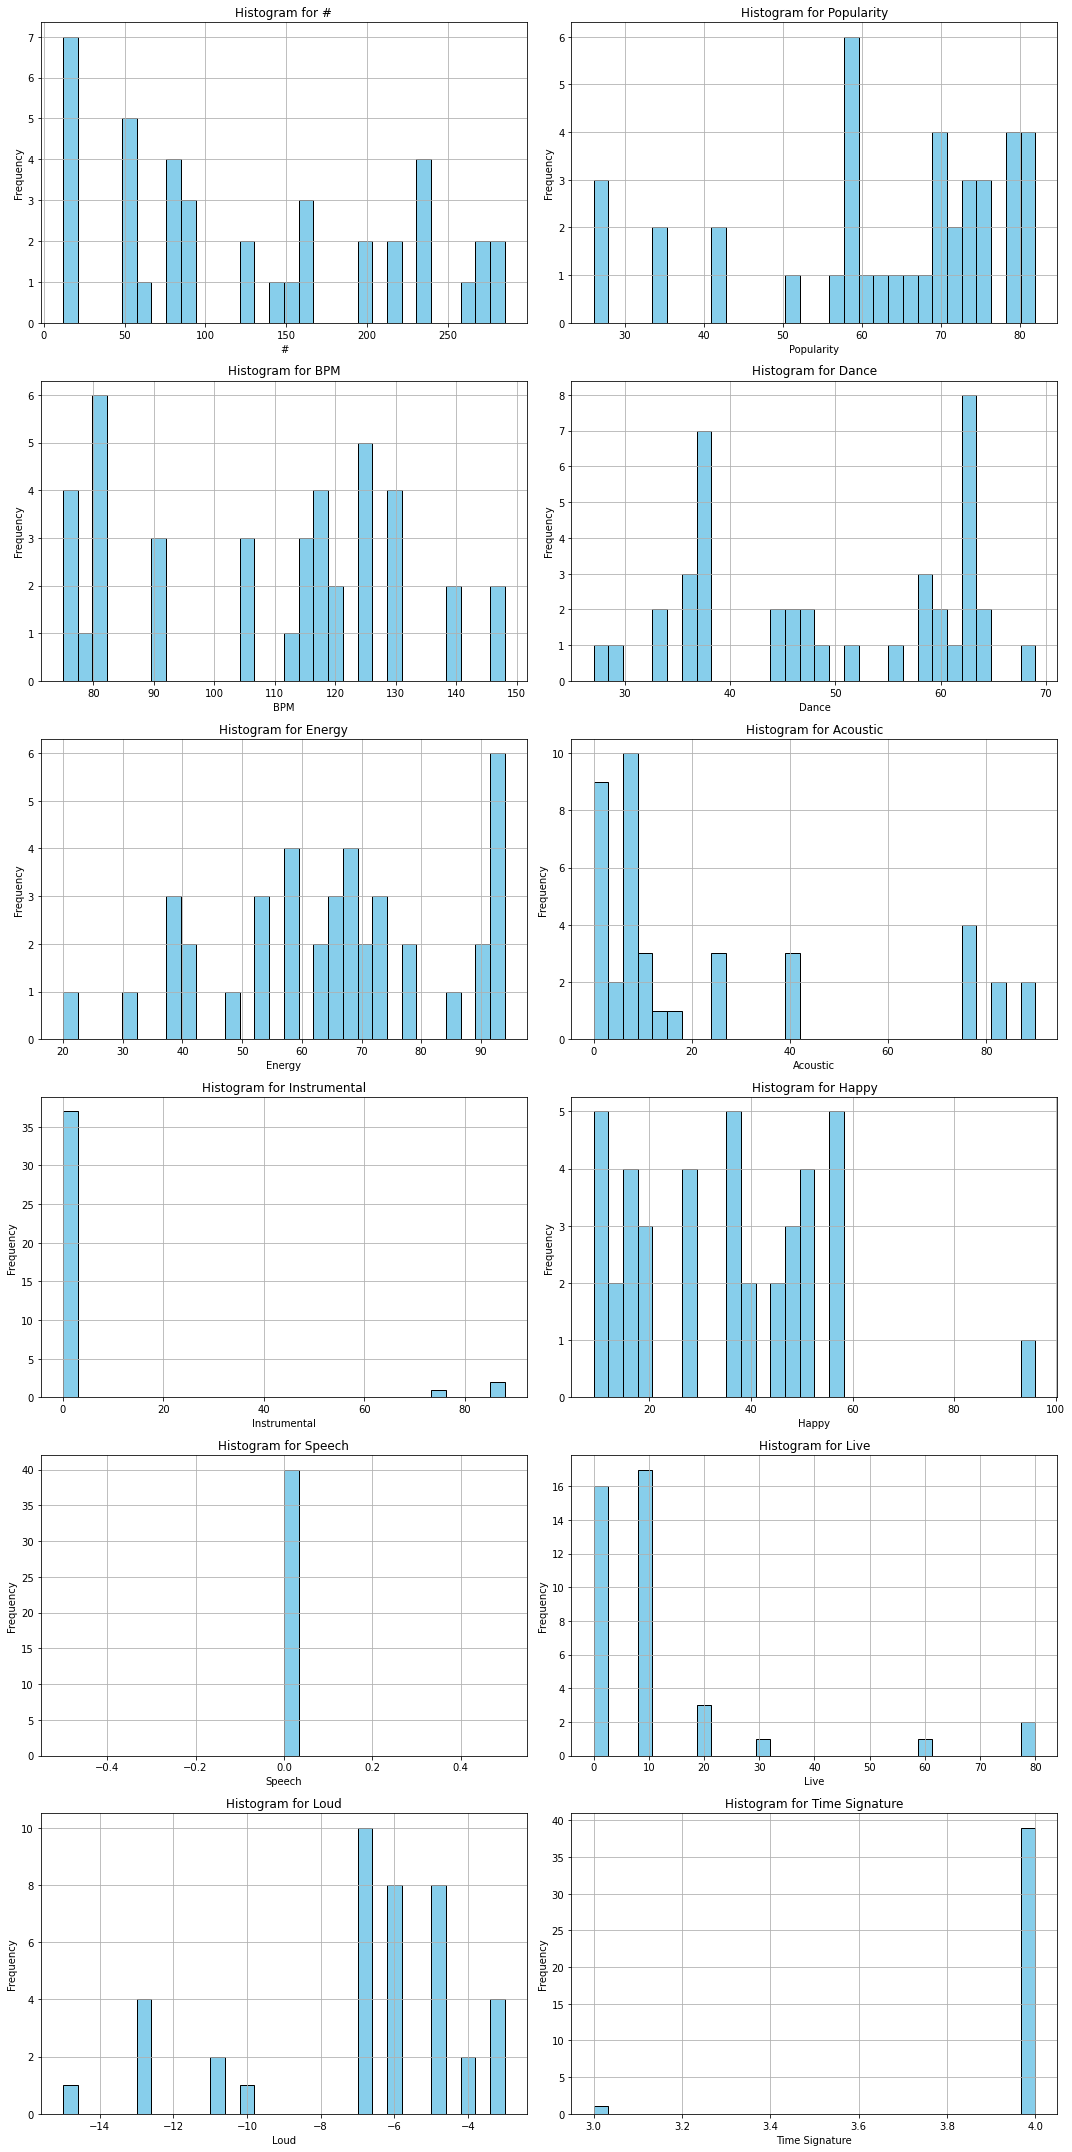

In [30]:
#DATA DISTRIBUTION
# Assuming df is your DataFrame with numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Determine the number of rows and columns for the subplots
num_columns = len(numeric_columns)
num_rows = (num_columns + 1) // 2  # Use // for integer division to round up if needed

# Set up the subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, 5 * num_rows))

# Flatten the axes if there is only one row
axes = axes.flatten()

# Iterate through each numeric column and create histograms
for i, column in enumerate(numeric_columns):
    df[column].hist(ax=axes[i], bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Histogram for {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

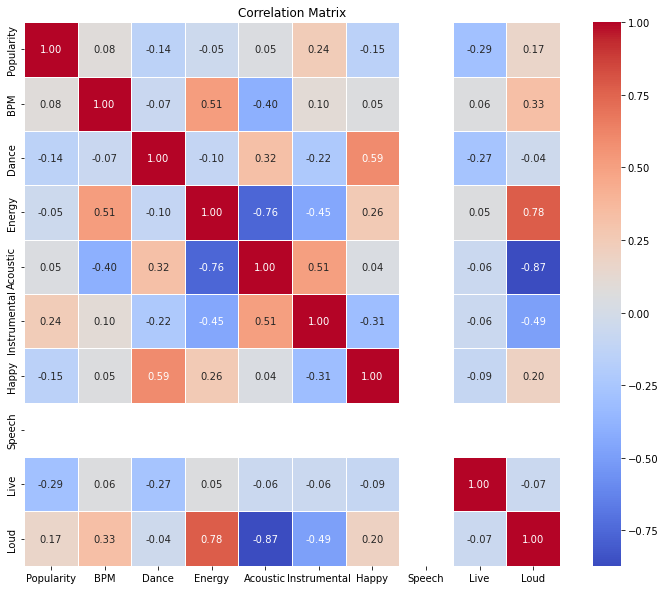

In [31]:
#CORRELATAION ANALYSIS
# Select numeric columns for correlation analysis
numeric_columns = ["Popularity", "BPM", "Time", "Dance", "Energy", "Acoustic",
                   "Instrumental", "Happy", "Speech", "Live", "Loud", "Camelot"]

# Create a correlation matrix
correlation_matrix = df[numeric_columns].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Customize the plot
plt.title("Correlation Matrix")
plt.show()

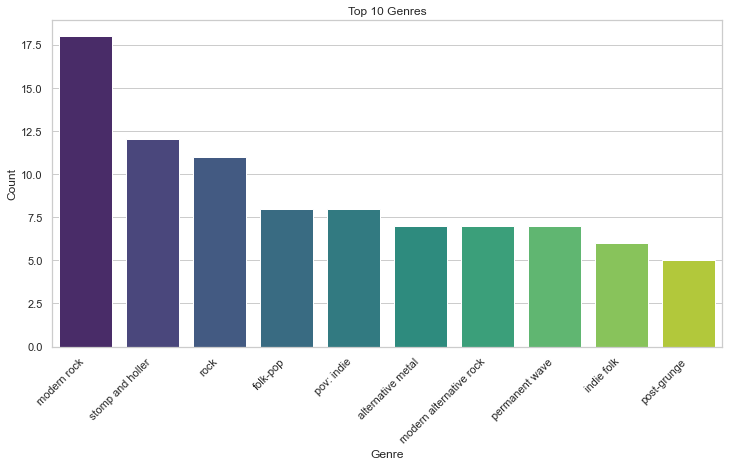

In [32]:
#TOP 10 GENRES
# Assuming 'Genres' is a column in your DataFrame with multiple genre names in each row
# Flatten the list of genres, handling missing values
all_genres = [genre for genres_list in df['Genres'].dropna() for genre in genres_list.split(', ')]

# Create a DataFrame with the counts of each genre
genre_counts = pd.Series(all_genres).value_counts().head(10).reset_index()
genre_counts.columns = ['Genre', 'Count']

# Plot the top 10 genres
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Create a bar plot for the top 10 genres
sns.barplot(x='Genre', y='Count', data=genre_counts, palette='viridis')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.title('Top 10 Genres')
plt.xlabel('Genre')
plt.ylabel('Count')

plt.show()

In [35]:
#RANDOM MUSIC RECOMMENDATION FROM MY PLAYLIST
import pandas as pd
import random  # Import the 'random' module

# Assuming 'Genres' is a column in your DataFrame with multiple genre names in each row
# Flatten the list of genres, handling missing values
all_genres = [genre for genres_list in df['Genres'].dropna() for genre in genres_list.split(', ')]

# Create a DataFrame with the counts of each genre
genre_counts = pd.Series(all_genres).value_counts().head(10).reset_index()
genre_counts.columns = ['Genre', 'Count']

# Choose a random genre from the top 10
random_genre = random.choice(genre_counts['Genre'])

# Filter your DataFrame to get songs with the chosen genre
filtered_songs = df[df['Genres'].str.contains(random_genre, na=False)]

# Choose a random song from the filtered list
random_song = filtered_songs.sample(n=1)

# Display the random song information
print(f"Random Song Recommendation for Genre '{random_genre}':")
print(f"Song: {random_song['Song'].values[0]}")
print(f"Artist: {random_song['Artist'].values[0]}")
print(f"Genres: {random_song['Genres'].values[0]}")
# Add more details as needed.

Random Song Recommendation for Genre 'rock':
Song: Best of You
Artist: Foo Fighters
Genres: alternative metal, alternative rock, modern rock, permanent wave, post-grunge, rock


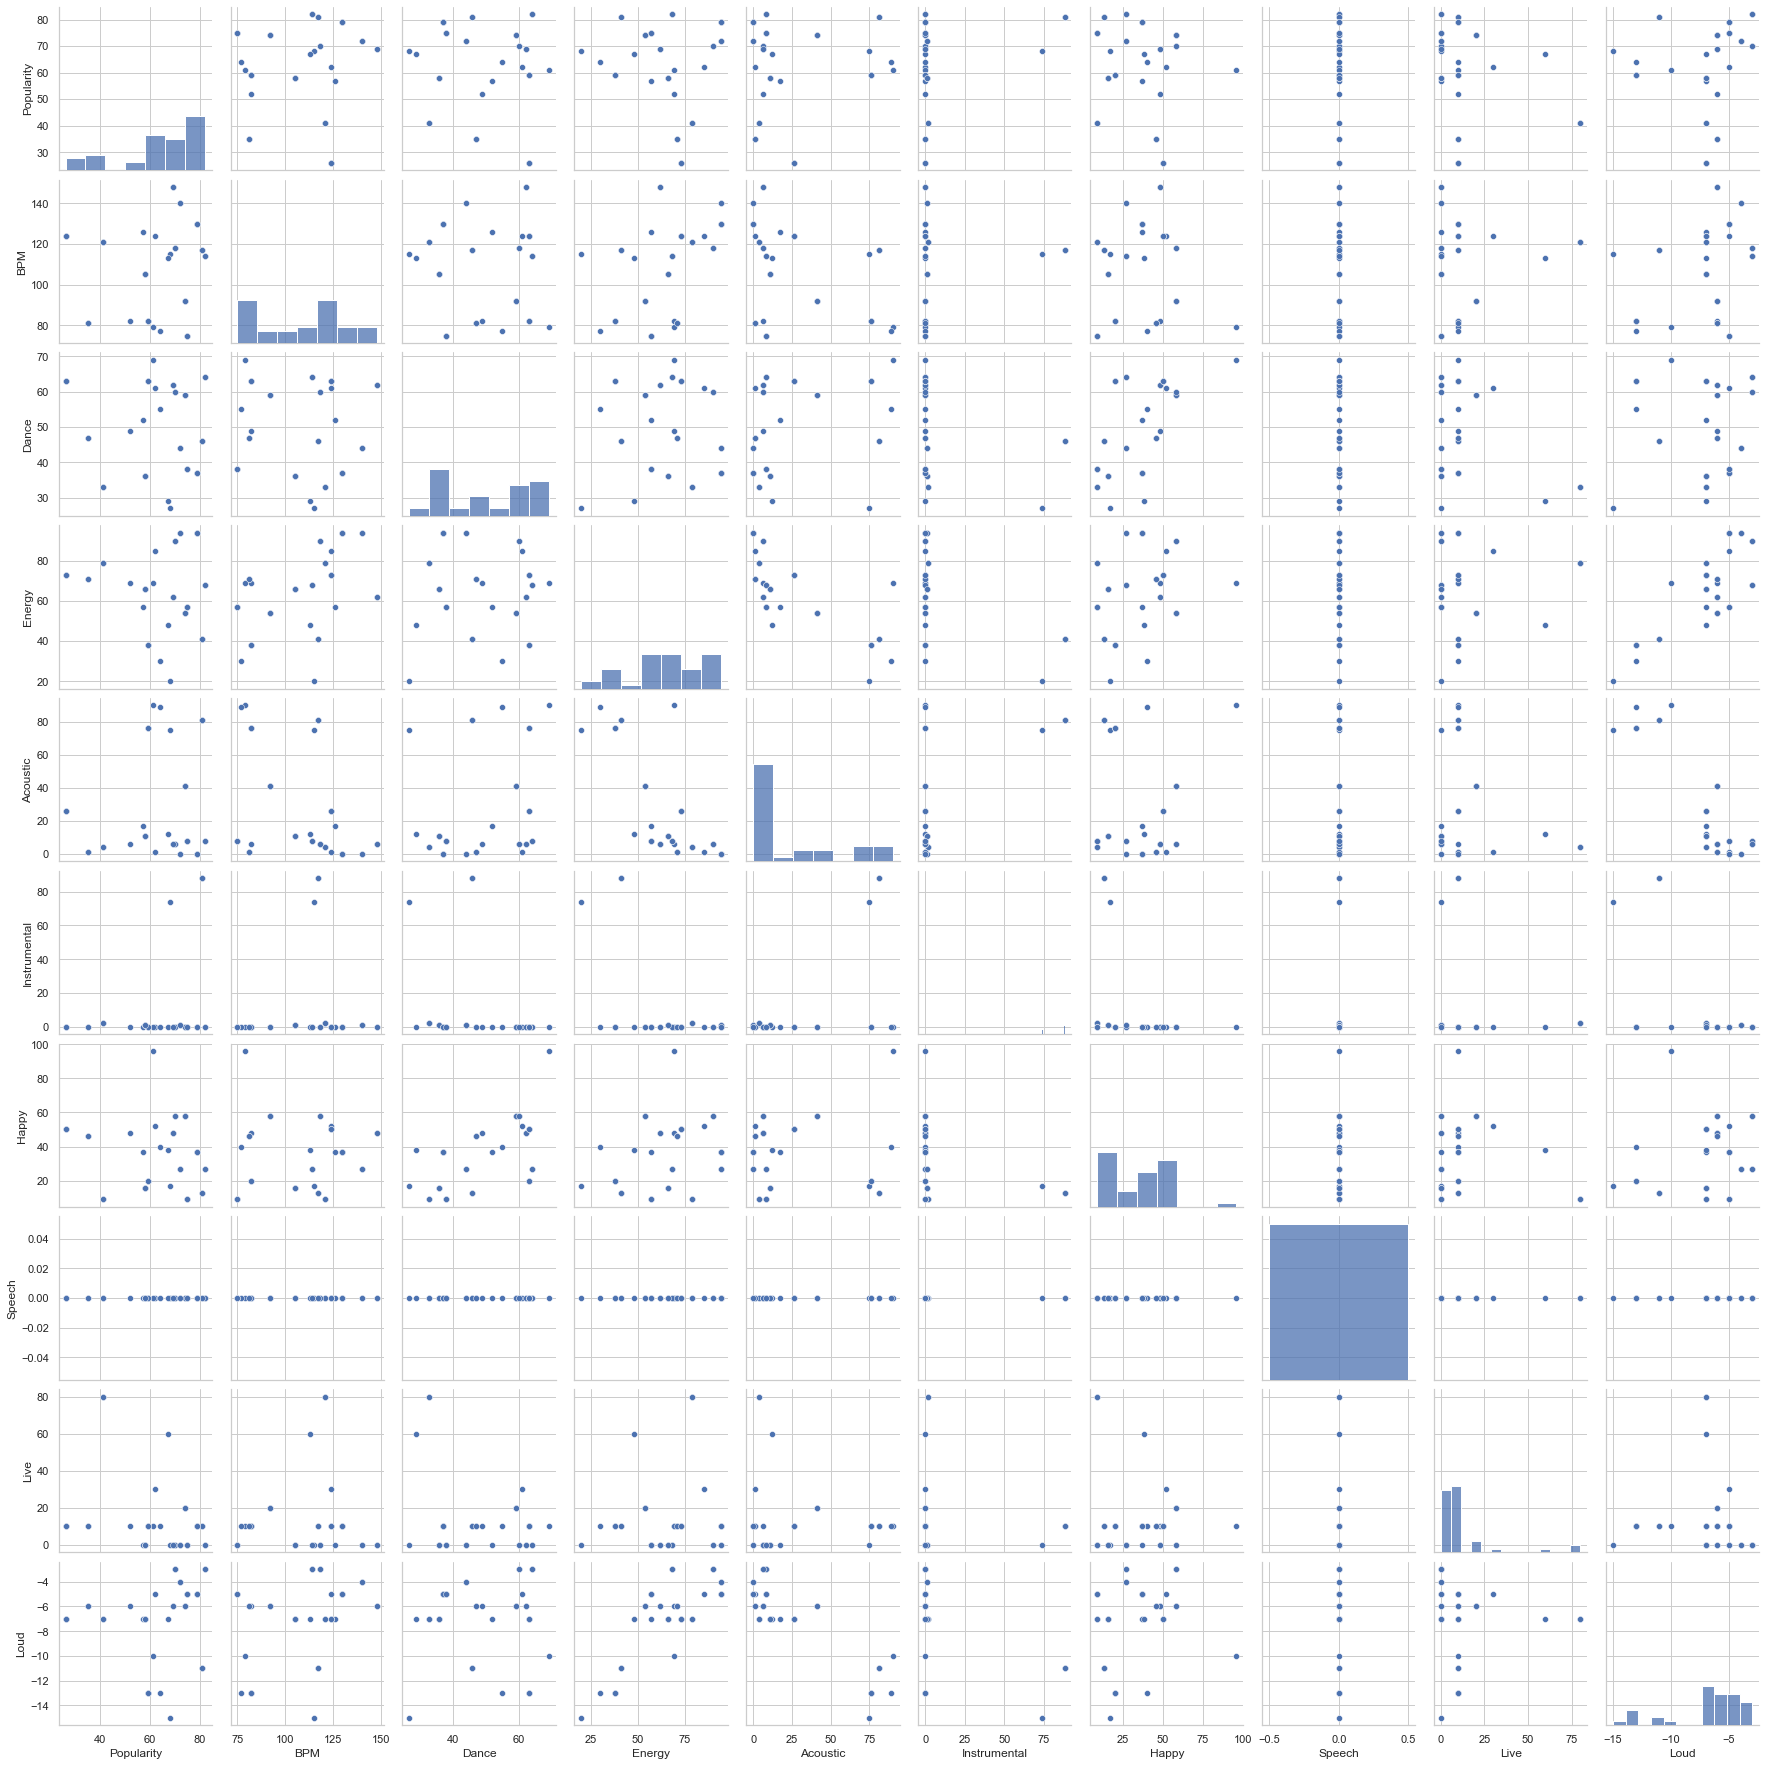

In [36]:
#PAIR PLOTS
# Select a subset of numeric columns for pair plot
numeric_columns = ["Popularity", "BPM", "Time", "Dance", "Energy", "Acoustic", "Instrumental", "Happy", "Speech", "Live", "Loud", "Camelot"]

# Create a pair plot for the selected numeric columns
sns.pairplot(df[numeric_columns])
plt.show()

In [37]:
# Specify the encoding explicitly if needed
df = pd.read_csv('/Users/ilkeoncu/Desktop/JUNIOR/CS210/CS210Project/All_in_all.csv', encoding='utf-8')

# Print all column names in the DataFrame
print(df.columns)

Index(['#', 'Song', 'Artist', 'Popularity', 'BPM', 'Genres', 'Parent Genres',
       'Album', 'Album Date', 'Time', 'Dance', 'Energy', 'Acoustic',
       'Instrumental', 'Happy', 'Speech', 'Live', 'Loud', 'Key',
       'Time Signature', 'Added At', 'Spotify Track Id', 'Album Label',
       'Camelot', 'Spotify Track Img', 'Song Preview'],
      dtype='object')


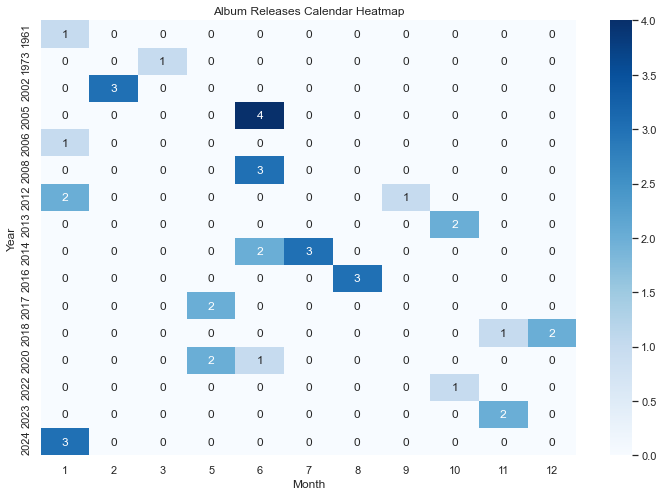

In [38]:
#CALENDAR HEATMAP
# Assuming 'Album Date' is a column in your DataFrame
df['Album Date'] = pd.to_datetime(df['Album Date'], errors='coerce')

# Set 'Album Date' as the index
df.set_index('Album Date', inplace=True)

# Create a calendar heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.groupby([df.index.year, df.index.month]).size().unstack().fillna(0), cmap='Blues', annot=True, fmt='g')
plt.title('Album Releases Calendar Heatmap')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

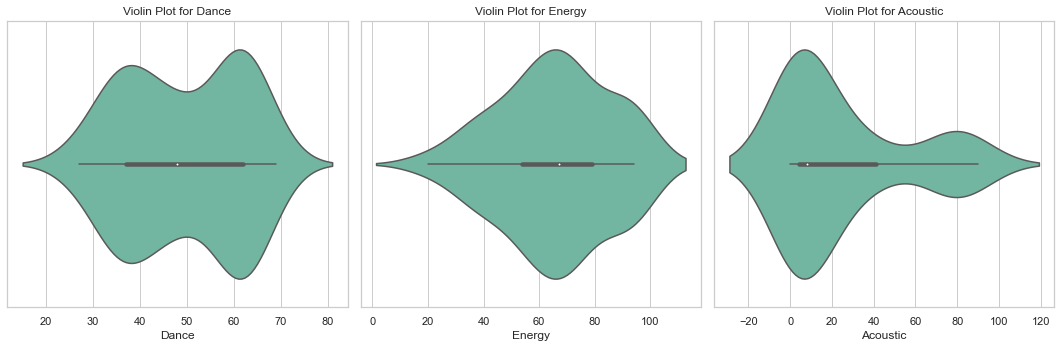

In [39]:
#DISTRIBUTION OF AUDIO FEATURES
# Assuming 'Dance', 'Energy', 'Acoustic', etc. are columns in your DataFrame
audio_features = ['Dance', 'Energy', 'Acoustic']  # Add more features as needed

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(audio_features), figsize=(15, 5))

# Iterate through each audio feature and create a violin plot
for i, feature in enumerate(audio_features):
    sns.violinplot(x=df[feature], ax=axes[i], palette='Set2')
    axes[i].set_title(f'Violin Plot for {feature}')

plt.tight_layout()
plt.show()

In [40]:
# Assuming 'Artist' is a column in your DataFrame
artists_list = df['Artist'].dropna().tolist()

# Display the artist names list
print(artists_list)

['mor ve ötesi', 'Kodaline', 'Hozier', 'Saint Motel', 'Palaye Royale', 'Palaye Royale', 'Foo Fighters', 'Oasis', 'Fleet Foxes', 'The Strumbellas', 'The Lumineers', 'The Strumbellas', 'Cage The Elephant', 'I DONT KNOW HOW BUT THEY FOUND ME', 'Pink Floyd', 'Chuck Berry', 'Novo Amor', 'The Paper Kites', 'Black Veil Brides', 'The Red Jumpsuit Apparatus', 'Hozier', 'Foo Fighters', 'The Lumineers', 'Fleet Foxes', 'mor ve ötesi', 'Oasis', 'Hozier', 'Cage The Elephant', 'Saint Motel', 'Palaye Royale', 'The Strumbellas', 'The Lumineers', 'Novo Amor', 'Fleet Foxes', 'Foo Fighters', 'Black Veil Brides', 'The Strumbellas', 'The Strumbellas', 'Foo Fighters', 'Oasis']


In [41]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


# Interactive Visualizations

In [42]:
#TOP 35 ARTISTS
import plotly.express as px

# Assuming 'df' is your DataFrame with the 'Artist' column
top_artists = df['Artist'].value_counts().head(35)

# Create an interactive bar chart
fig = px.bar(top_artists, x=top_artists.index, y=top_artists.values, labels={'x': 'Artist', 'y': 'Count'},
             title='Top 35 Artists in Your Dataset', template='plotly_dark')

# Rotate x-axis labels for better readability
fig.update_layout(xaxis_tickangle=-45)

# Show the interactive chart
fig.show()

In [43]:
#GEOGRAPHICAL ANALYSIS OF SONGS
# Assuming 'df' is your DataFrame and 'Album Label' contains location data
fig = px.scatter_geo(df, locationmode='country names', locations='Album Label',
                     title='Geographical Analysis of Songs by Album Labels',
                     template='plotly_dark', color='Song', size='Popularity')

# Show the interactive map
fig.show()

In [44]:
#POPULARITY OF SONGS
# Assuming 'df' is your DataFrame and 'Album Label' contains non-geographical data
fig = px.bar(df, x='Album Label', y='Popularity', 
             title='Popularity of Songs by Album Label',
             labels={'Popularity': 'Popularity Score', 'Album Label': 'Album Label'},
             template='plotly_dark')

# Show the bar chart
fig.show()


In [45]:
#SCATTER PLOT MATRIX
fig = px.scatter_matrix(df, dimensions=["Dance", "Energy", "Acoustic", "Instrumental", "Happy"],
                        color="Popularity", title="Scatter Plot Matrix")
fig.show()

In [46]:
#BOX PLOT OF POPULARITY ACROSS GENRES
fig = px.box(df, x="Parent Genres", y="Popularity", color="Parent Genres",
             title="Box Plot of Popularity Across Parent Genres")
fig.show()

In [47]:
pip install matplotlib seaborn pandas

Note: you may need to restart the kernel to use updated packages.


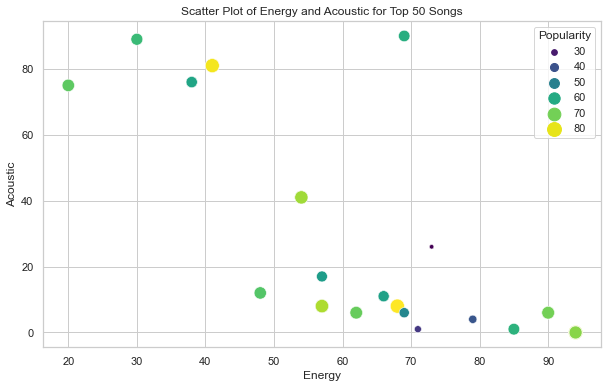

In [48]:
#ENERGY AND ACOUSTIC FOR TOP 50 SONGS
# Assuming df is your dataframe containing the relevant columns
# Replace 'your_dataset.csv' with your actual dataset
df = pd.read_csv('/Users/ilkeoncu/Desktop/JUNIOR/CS210/CS210Project/All_in_all.csv')

# Sort the dataframe by Popularity and select the top 50 songs
top_50_songs = df.sort_values(by='Popularity', ascending=False).head(50)

# Scatter plot of 'Energy' and 'Acoustic' for the top 50 songs
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Energy', y='Acoustic', data=top_50_songs, hue='Popularity', palette='viridis', size='Popularity', sizes=(20, 200))
plt.title('Scatter Plot of Energy and Acoustic for Top 50 Songs')
plt.xlabel('Energy')
plt.ylabel('Acoustic')
plt.legend(title='Popularity')
plt.show()


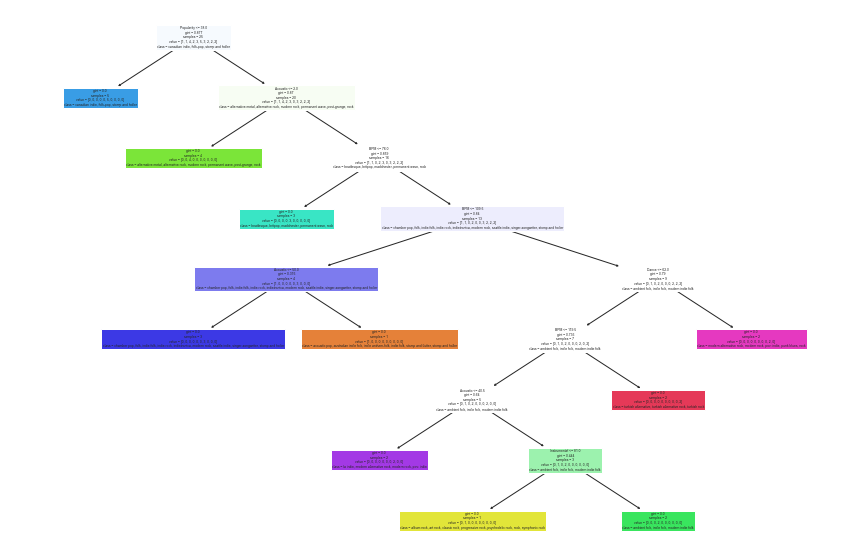

In [49]:
#DECISION TREE
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Select only numeric columns for filling missing values
numeric_columns = df.select_dtypes(include='number').columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Drop rows with any remaining NaN values
df = df.dropna()

# Select relevant features and target
X = df[['Popularity', 'BPM', 'Dance', 'Energy', 'Acoustic', 'Instrumental', 'Happy', 'Speech', 'Live', 'Loud']]
y = df['Genres']

# Create and fit the decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X, y)

# Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=clf.classes_)
plt.show()

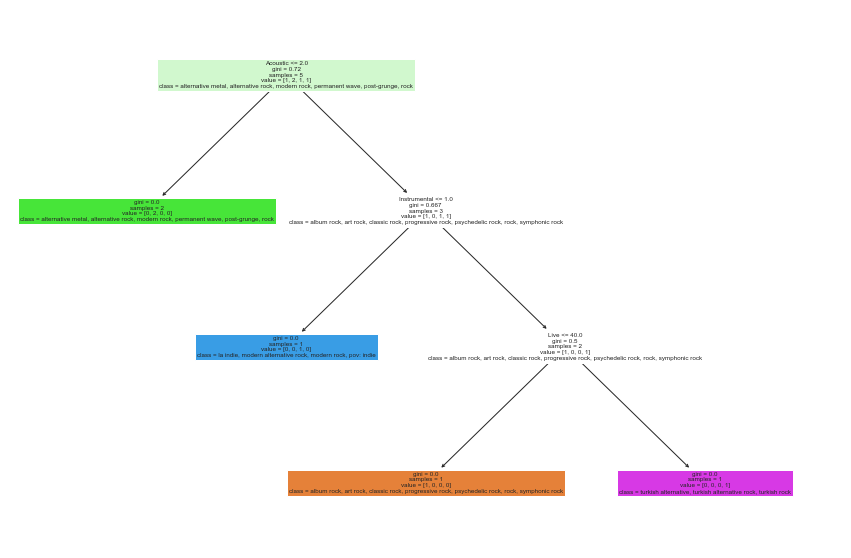

In [50]:
clf = DecisionTreeClassifier(max_depth=3)
sample_size = 5
# Adjust the sample size as needed
df_subset = df.sample(sample_size, random_state=42)

X_subset = df_subset[['Popularity', 'BPM', 'Dance', 'Energy', 'Acoustic', 'Instrumental', 'Happy', 'Speech', 'Live', 'Loud']]
y_subset = df_subset['Genres']

clf_subset = DecisionTreeClassifier()
clf_subset.fit(X_subset, y_subset)

plt.figure(figsize=(15, 10))
plot_tree(clf_subset, filled=True, feature_names=X_subset.columns, class_names=clf_subset.classes_)
plt.show(block=True)

# Unsupervised Learning

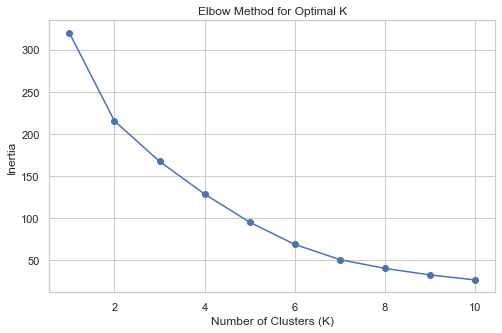

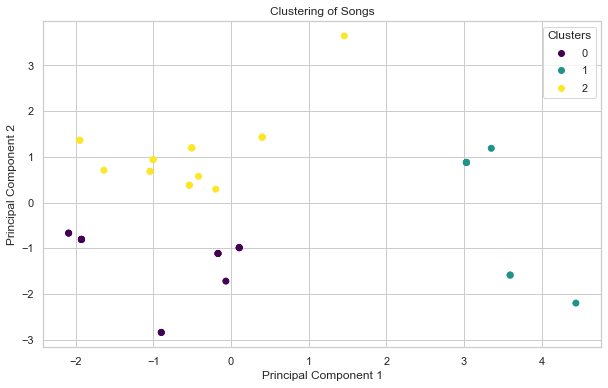

                  #  Popularity         BPM      Dance     Energy   Acoustic  \
Cluster                                                                        
0        160.400000   67.200000  113.000000  36.866667  75.933333   5.133333   
1        211.428571   67.285714   96.000000  51.857143  35.142857  79.142857   
2         72.722222   58.000000  110.055556  59.055556  69.055556  19.833333   

         Instrumental      Happy  Speech       Live       Loud  Time Signature  
Cluster                                                                         
0            0.600000  22.200000     0.0  17.333333  -5.666667        4.000000  
1           35.714286  20.428571     0.0   8.571429 -12.714286        4.000000  
2            0.000000  50.833333     0.0   8.888889  -5.722222        3.944444  


In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the data
file_path = '/Users/ilkeoncu/Desktop/JUNIOR/CS210/CS210Project/All_in_all.csv'
df = pd.read_csv(file_path)

# Select relevant features for clustering
features = df[['BPM', 'Dance', 'Energy', 'Acoustic', 'Instrumental', 'Happy', 'Speech', 'Live', 'Loud']]

# Standardize the features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_standardized)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_standardized)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

# Based on the Elbow Method, choose the optimal K and fit the KMeans model
optimal_k = 3  # Choose based on the Elbow Method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_standardized)

# Visualize clusters in 2D using PCA
plt.figure(figsize=(10, 6))
scatter = plt.scatter(features_pca[:, 0], features_pca[:, 1], c=df['Cluster'], cmap='viridis')
plt.title('Clustering of Songs')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(*scatter.legend_elements(), title='Clusters')
plt.show()

# Explore the characteristics of each cluster
cluster_means = df.groupby('Cluster').mean()
print(cluster_means)

# Spotify API Music Recommendation

In [52]:
pip install spotipy

Note: you may need to restart the kernel to use updated packages.


In [53]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth

# Set your Spotify API credentials
client_id = 'd0d85f6d0f324d40adc981ae5898766a'
client_secret = '5f241cb4b5c546cba6e0d96ec92c3193'
redirect_uri = 'http://localhost:8890/callback'  # Change the port to 8889 or any other available port

# Define the desired scopes
scopes = ['user-library-read', 'playlist-read-private', 'user-read-private']  # Add the scopes you need

# Create a Spotify OAuth object with the correct scopes
sp_oauth = SpotifyOAuth(client_id=client_id, client_secret=client_secret, redirect_uri=redirect_uri, scope=scopes)

# Get the authorization URL
auth_url = sp_oauth.get_authorize_url()
print(f'Please visit this URL to authorize your application: {auth_url}')

Please visit this URL to authorize your application: https://accounts.spotify.com/authorize?client_id=d0d85f6d0f324d40adc981ae5898766a&response_type=code&redirect_uri=http%3A%2F%2Flocalhost%3A8890%2Fcallback&scope=playlist-read-private+user-library-read+user-read-private


In [55]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [57]:
import requests

# Replace these with your actual client ID and client secret
client_id = 'd0d85f6d0f324d40adc981ae5898766a'
client_secret = '5f241cb4b5c546cba6e0d96ec92c3193'

# Spotify token endpoint
token_url = 'https://accounts.spotify.com/api/token'

# Set up the request payload to obtain a client credentials token
payload = {
    'grant_type': 'client_credentials',
    'client_id': client_id,
    'client_secret': client_secret,
}

# Make a POST request to the token endpoint to get a new access token
response = requests.post(token_url, data=payload)

if response.status_code == 200:
    # Parse the response to get the new access token
    access_token = response.json()['access_token']

    # Set up the request for recommendations
    recommendations_url = 'https://api.spotify.com/v1/recommendations'
    headers = {'Authorization': f'Bearer {access_token}'}

    # Set up seed parameters (artists, genres, tracks)
    seed_artists = '4NHQUGzhtTLFvgF5SZesLK'  # Example artist ID (replace with your own)
    seed_genres = 'pop,rock'  # Example genres (replace with your own)
    seed_tracks = '0c6xIDDpzE81m2q797ordA'  # Example track ID (replace with your own)

    # Set up the request payload for recommendations
    params = {
        'seed_artists': seed_artists,
        'seed_genres': seed_genres,
        'seed_tracks': seed_tracks,
    }

    # Make a GET request to the recommendations endpoint
    response = requests.get(recommendations_url, headers=headers, params=params)

    if response.status_code == 200:
        data = response.json()
        # Now 'data' contains the recommended tracks
        print(data)
    else:
        print(f"Error: {response.status_code} - {response.text}")
else:
    print(f"Error obtaining access token: {response.status_code} - {response.text}")


{'tracks': [{'album': {'album_type': 'ALBUM', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/4yiQZ8tQPux8cPriYMWUFP'}, 'href': 'https://api.spotify.com/v1/artists/4yiQZ8tQPux8cPriYMWUFP', 'id': '4yiQZ8tQPux8cPriYMWUFP', 'name': 'Gwen Stefani', 'type': 'artist', 'uri': 'spotify:artist:4yiQZ8tQPux8cPriYMWUFP'}], 'available_markets': ['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CL', 'CO', 'CR', 'CY', 'CZ', 'DK', 'DO', 'DE', 'EC', 'EE', 'SV', 'FI', 'FR', 'GR', 'GT', 'HN', 'HK', 'HU', 'IS', 'IT', 'LV', 'LT', 'LU', 'MY', 'MT', 'MX', 'NL', 'NZ', 'NI', 'NO', 'PA', 'PY', 'PE', 'PH', 'PL', 'PT', 'SG', 'SK', 'ES', 'SE', 'CH', 'TW', 'TR', 'UY', 'AD', 'LI', 'MC', 'ID', 'JP', 'TH', 'VN', 'RO', 'IL', 'ZA', 'PS', 'IN', 'BY', 'KZ', 'MD', 'UA', 'AL', 'BA', 'HR', 'ME', 'MK', 'RS', 'SI', 'KR', 'BD', 'PK', 'LK', 'GH', 'KE', 'NG', 'TZ', 'UG', 'AG', 'AM', 'BS', 'BB', 'BZ', 'BT', 'BW', 'BF', 'CV', 'CW', 'DM', 'FJ', 'GM', 'GE', 'GD', 'GW', 'GY', 'HT', 'JM', 'KI', 'LS', 'LR', 'MW', 'M

In [60]:
import base64
import requests

# Your Spotify API credentials
client_id = 'd0d85f6d0f324d40adc981ae5898766a'
client_secret = '5f241cb4b5c546cba6e0d96ec92c3193'


# Spotify token endpoint
token_url = 'https://accounts.spotify.com/api/token'

# Base64 encode the client ID and client secret
base64_credentials = base64.b64encode(f"{client_id}:{client_secret}".encode('utf-8')).decode('utf-8')

# Set up the request payload
payload = {
    'grant_type': 'client_credentials',
}

# Set up the request headers with the encoded client credentials
headers = {
    'Authorization': f'Basic {base64_credentials}',
}

# Make a POST request to the token endpoint to get the access token
response = requests.post(token_url, data=payload, headers=headers)

if response.status_code == 200:
    # Parse the response to get the access token
    access_token = response.json()['access_token']
    print(f"Access Token: {access_token}")
else:
    print(f"Error obtaining access token: {response.status_code} - {response.text}")


Access Token: BQAzKVAmr1-LrnQgtCIMJ1OyHcEvqP2CrSNveOPkGXIb3eL3zGLtMeXATdJjNNLIbFbF790iFCwJubM_ibF_h78Yn9mtxvpr8jG3hrAlI2BuBM_zFkY


In [61]:
import base64
import requests

# Your Spotify API credentials
client_id = 'd0d85f6d0f324d40adc981ae5898766a'
client_secret = '5f241cb4b5c546cba6e0d96ec92c3193'

# Spotify token endpoint
token_url = 'https://accounts.spotify.com/api/token'

# Base64 encode the client ID and client secret
base64_credentials = base64.b64encode(f"{client_id}:{client_secret}".encode('utf-8')).decode('utf-8')

# Set up the request payload to obtain a client credentials token
payload = {
    'grant_type': 'client_credentials',
}

# Set up the request headers with the encoded client credentials
headers = {
    'Authorization': f'Basic {base64_credentials}',
}

# Make a POST request to the token endpoint to get the access token
response = requests.post(token_url, data=payload, headers=headers)

if response.status_code == 200:
    # Parse the response to get the access token
    access_token = response.json()['access_token']

    # Set up the request for recommendations
    recommendations_url = 'https://api.spotify.com/v1/recommendations'
    
    # Replace 'seed_track_id' with an actual track ID
    seed_track_id = '279LczresTWVkCsdLwgJSZ'
    
    # Set up the request payload for recommendations
    params = {
        'seed_tracks': seed_track_id,
        'limit': 10,  # Number of recommendations you want to receive
    }

    # Set up the request headers with the access token
    headers = {'Authorization': f'Bearer {access_token}'}

    # Make a GET request to the recommendations endpoint
    response = requests.get(recommendations_url, headers=headers, params=params)

    if response.status_code == 200:
        data = response.json()
        recommended_tracks = [track['name'] for track in data['tracks']]
        print(f"Recommended Tracks: {recommended_tracks}")
    else:
        print(f"Error getting recommendations: {response.status_code} - {response.text}")
else:
    print(f"Error obtaining access token: {response.status_code} - {response.text}")


Recommended Tracks: ['Strange Entity', 'Shine Again', 'Suspirium', 'Restless Heart', 'Come to the Fore', 'My Own Game', 'Jupiter', 'Driving on the Highway', 'Wanda', 'Rising']


Recommended Tracks: Rock

In [62]:
import base64
import requests

# Your Spotify API credentials
client_id = 'd0d85f6d0f324d40adc981ae5898766a'
client_secret = '5f241cb4b5c546cba6e0d96ec92c3193'

# Spotify token endpoint
token_url = 'https://accounts.spotify.com/api/token'

# Base64 encode the client ID and client secret
base64_credentials = base64.b64encode(f"{client_id}:{client_secret}".encode('utf-8')).decode('utf-8')

# Set up the request payload to obtain a client credentials token
payload = {
    'grant_type': 'client_credentials',
}

# Set up the request headers with the encoded client credentials
headers = {
    'Authorization': f'Basic {base64_credentials}',
}

# Make a POST request to the token endpoint to get the access token
response = requests.post(token_url, data=payload, headers=headers)

if response.status_code == 200:
    # Parse the response to get the access token
    access_token = response.json()['access_token']

    # Set up the request for recommendations
    recommendations_url = 'https://api.spotify.com/v1/recommendations'
    
    # Replace 'seed_track_id' with an actual track ID
    seed_track_id = '1tpSOLApZSgDaFqYHIeQl9'
    
    # Set up the request payload for recommendations
    params = {
        'seed_tracks': seed_track_id,
        'limit': 10,  # Number of recommendations you want to receive
    }

    # Set up the request headers with the access token
    headers = {'Authorization': f'Bearer {access_token}'}

    # Make a GET request to the recommendations endpoint
    response = requests.get(recommendations_url, headers=headers, params=params)

    if response.status_code == 200:
        data = response.json()
        recommended_tracks = [track['name'] for track in data['tracks']]
        print(f"Recommended Tracks: {recommended_tracks}")
    else:
        print(f"Error getting recommendations: {response.status_code} - {response.text}")
else:
    print(f"Error obtaining access token: {response.status_code} - {response.text}")



Recommended Tracks: ['Feels', 'Amadeus', 'Take Me Home', 'Speak Too Soon', 'Sirens', 'Off The Main Drag', 'All Your Love', 'Ukulele Song', 'Runaway', 'Chalk']


Recommended Tracks: Folk/Acoustic, Pop

# THE END...